Problem Statement
As a junior data analyst intern in a firm. For one of the clients XYZ
marketings, your manager asked you to do a customer segmentation ML
model that can, later on, be developed to give recommendations like
saving plans, loans, wealth management, etc. on target customer groups
of XYZ Marketings. For this, you have been provided with a dataset
summarising the usage behavior of active credit card holders during the
last 6 months in XYZ Marketings.

Expected Outcomes:
Create a machine learning clustering model that group people based on
their behaviours and usage data.

• Understand the given problem and explore the data set, and do the
necessary data pre-processing.

• Do exploratory data analysis to understand and visualize the data.

• Work on various versions of clustering models, with parameter tuning
and adjustments to select an ML model that performs best for the data
at hand.

• Evaluate your results and find the best algorithm that segregates the
customers. (i.e. Explain why you selected the final model, and what
makes it the best one)

1) Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2) Load the data

In [2]:
df = pd.read_csv('CustomerData.csv')

3) Data Understanding

In [3]:
#get data shape
df.shape

(8950, 18)

In [4]:
#get data type, make sure in the correct types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Customer ID: A unique identifier assigned to each customer by the credit card issuer to keep track of their account details and transactions

Purchases: The total amount of money spent by the cardholder on goods and services using their credit card
One-off Purchases: The amount of money spent by the cardholder on a single purchase using their credit card
Installment Purchases: The amount of money spent by the cardholder on purchases that are paid back in installments over time

Cash Advance: A cash withdrawal made by the cardholder from an ATM or bank using their credit card, which is subject to higher interest rates and fees than regular purchases

Purchases Frequency: The number of times a cardholder makes purchases using their credit card in a given period

One-off Purchases Frequency: The number of times a cardholder makes a single purchase using their credit card in a given period

Purchases Installments Frequency: The number of times a cardholder makes installment purchases using their credit card in a given period 

Cash Advance Frequency: The number of times a cardholder makes cash advances using their credit card in a given period 

Cash Advance TRX: The total number of cash advances made by the cardholder using their credit card 

Purchases TRX: The total number of purchases made by the cardholder using their credit card

The attributes that are related to the creditworthiness:

Balance (amount owed): The total amount of money owed by the cardholder to the credit card issuer, including purchases, cash advances, and interest charges

Balance Frequency: The number of times a cardholder makes payments towards their outstanding balance in a given period

Credit Limit: The maximum amount of money that can be borrowed by the cardholder from the credit card issuer, based on their creditworthiness and other factors

Payments: The total amount of money paid by the cardholder towards their outstanding balance, including principal and interest payments

Minimum Payments: The minimum amount of money required to be paid by the cardholder towards their outstanding balance each month, as specified in the credit card agreement

PRC Full payment: A measure of how often the cardholder pays off their entire outstanding balance each month, expressed as a percentage

Tenure: The length of time for which the credit account is open and active, as specified in the credit agreement

Extra :
The following are the five factors that determine your credit score:
1. **Payment history**: This is the most important factor that influences a credit score, accounting for **35%** of your score. It is a record of whether you’ve made on-time payments for each of your credit accounts, such as credit cards and loans. Late payments can negatively affect your credit score, and the extent to which it impacts your credit score depends on the severity of lateness, how recently a late payment was made, and how frequently you make late payments
2. **Amount owed**: This factor accounts for **30%** of your credit score. It is a measure of how much you owe on all your accounts, including loans and credit cards. High balances can negatively impact your score.
3. **Length of credit history**: This factor accounts for **15%** of your credit score. It is a measure of how long you’ve had credit accounts open. Generally, the longer an account has been open and active, the better it is for the credit score. A longer credit history, including the average age of accounts, will help boost your score. Closed accounts can stay on your credit reports for up to 10 years and increase the average age of your accounts during that time.
4. **New credit**: This factor accounts for **10%** of your credit score. It is a measure of how many new accounts you’ve opened recently. Opening too many new accounts in a short period can negatively impact your score.
5. **Credit mix**: This factor accounts for **10%** of your credit score. It is a measure of the types of accounts you have, such as revolving or installment loans.

In [3]:
#ID is not required in EDA
df=df.drop(['CUST_ID'], axis=1)

In [4]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


4) Data cleaning

In [8]:
# search for missing values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#drop rows with missing values
df=df.dropna()

In [10]:
#statistical values of the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [11]:
#count no of outliers
for i,j in df.items():
    if df[i].dtypes != 'O':
        #make sure it is not object type and apply fillna
        print('Column Name : ', i)
        print('No of outliers : ', len(find_anomalies(df[i].fillna(0))))
        print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0)))/df.shape[0]*100,2))
        #if it is a float type, convert to int
        if df[i].dtypes == 'float64':
            print('Column Name : ', i)
            print('No of outliers : ', len(find_anomalies(df[i].fillna(0).astype(int))))
            print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0).astype(int)))/df.shape[0]*100,2))

Column Name :  BALANCE
No of outliers :  186
Outliers % :  2.15
Column Name :  BALANCE
No of outliers :  186
Outliers % :  2.15
Column Name :  BALANCE_FREQUENCY
No of outliers :  168
Outliers % :  1.95
Column Name :  BALANCE_FREQUENCY
No of outliers :  0
Outliers % :  0.0
Column Name :  PURCHASES
No of outliers :  129
Outliers % :  1.49
Column Name :  PURCHASES
No of outliers :  129
Outliers % :  1.49
Column Name :  ONEOFF_PURCHASES
No of outliers :  121
Outliers % :  1.4
Column Name :  ONEOFF_PURCHASES
No of outliers :  121
Outliers % :  1.4
Column Name :  INSTALLMENTS_PURCHASES
No of outliers :  130
Outliers % :  1.51
Column Name :  INSTALLMENTS_PURCHASES
No of outliers :  130
Outliers % :  1.51
Column Name :  CASH_ADVANCE
No of outliers :  177
Outliers % :  2.05
Column Name :  CASH_ADVANCE
No of outliers :  177
Outliers % :  2.05
Column Name :  PURCHASES_FREQUENCY
No of outliers :  0
Outliers % :  0.0
Column Name :  PURCHASES_FREQUENCY
No of outliers :  0
Outliers % :  0.0
Column Na

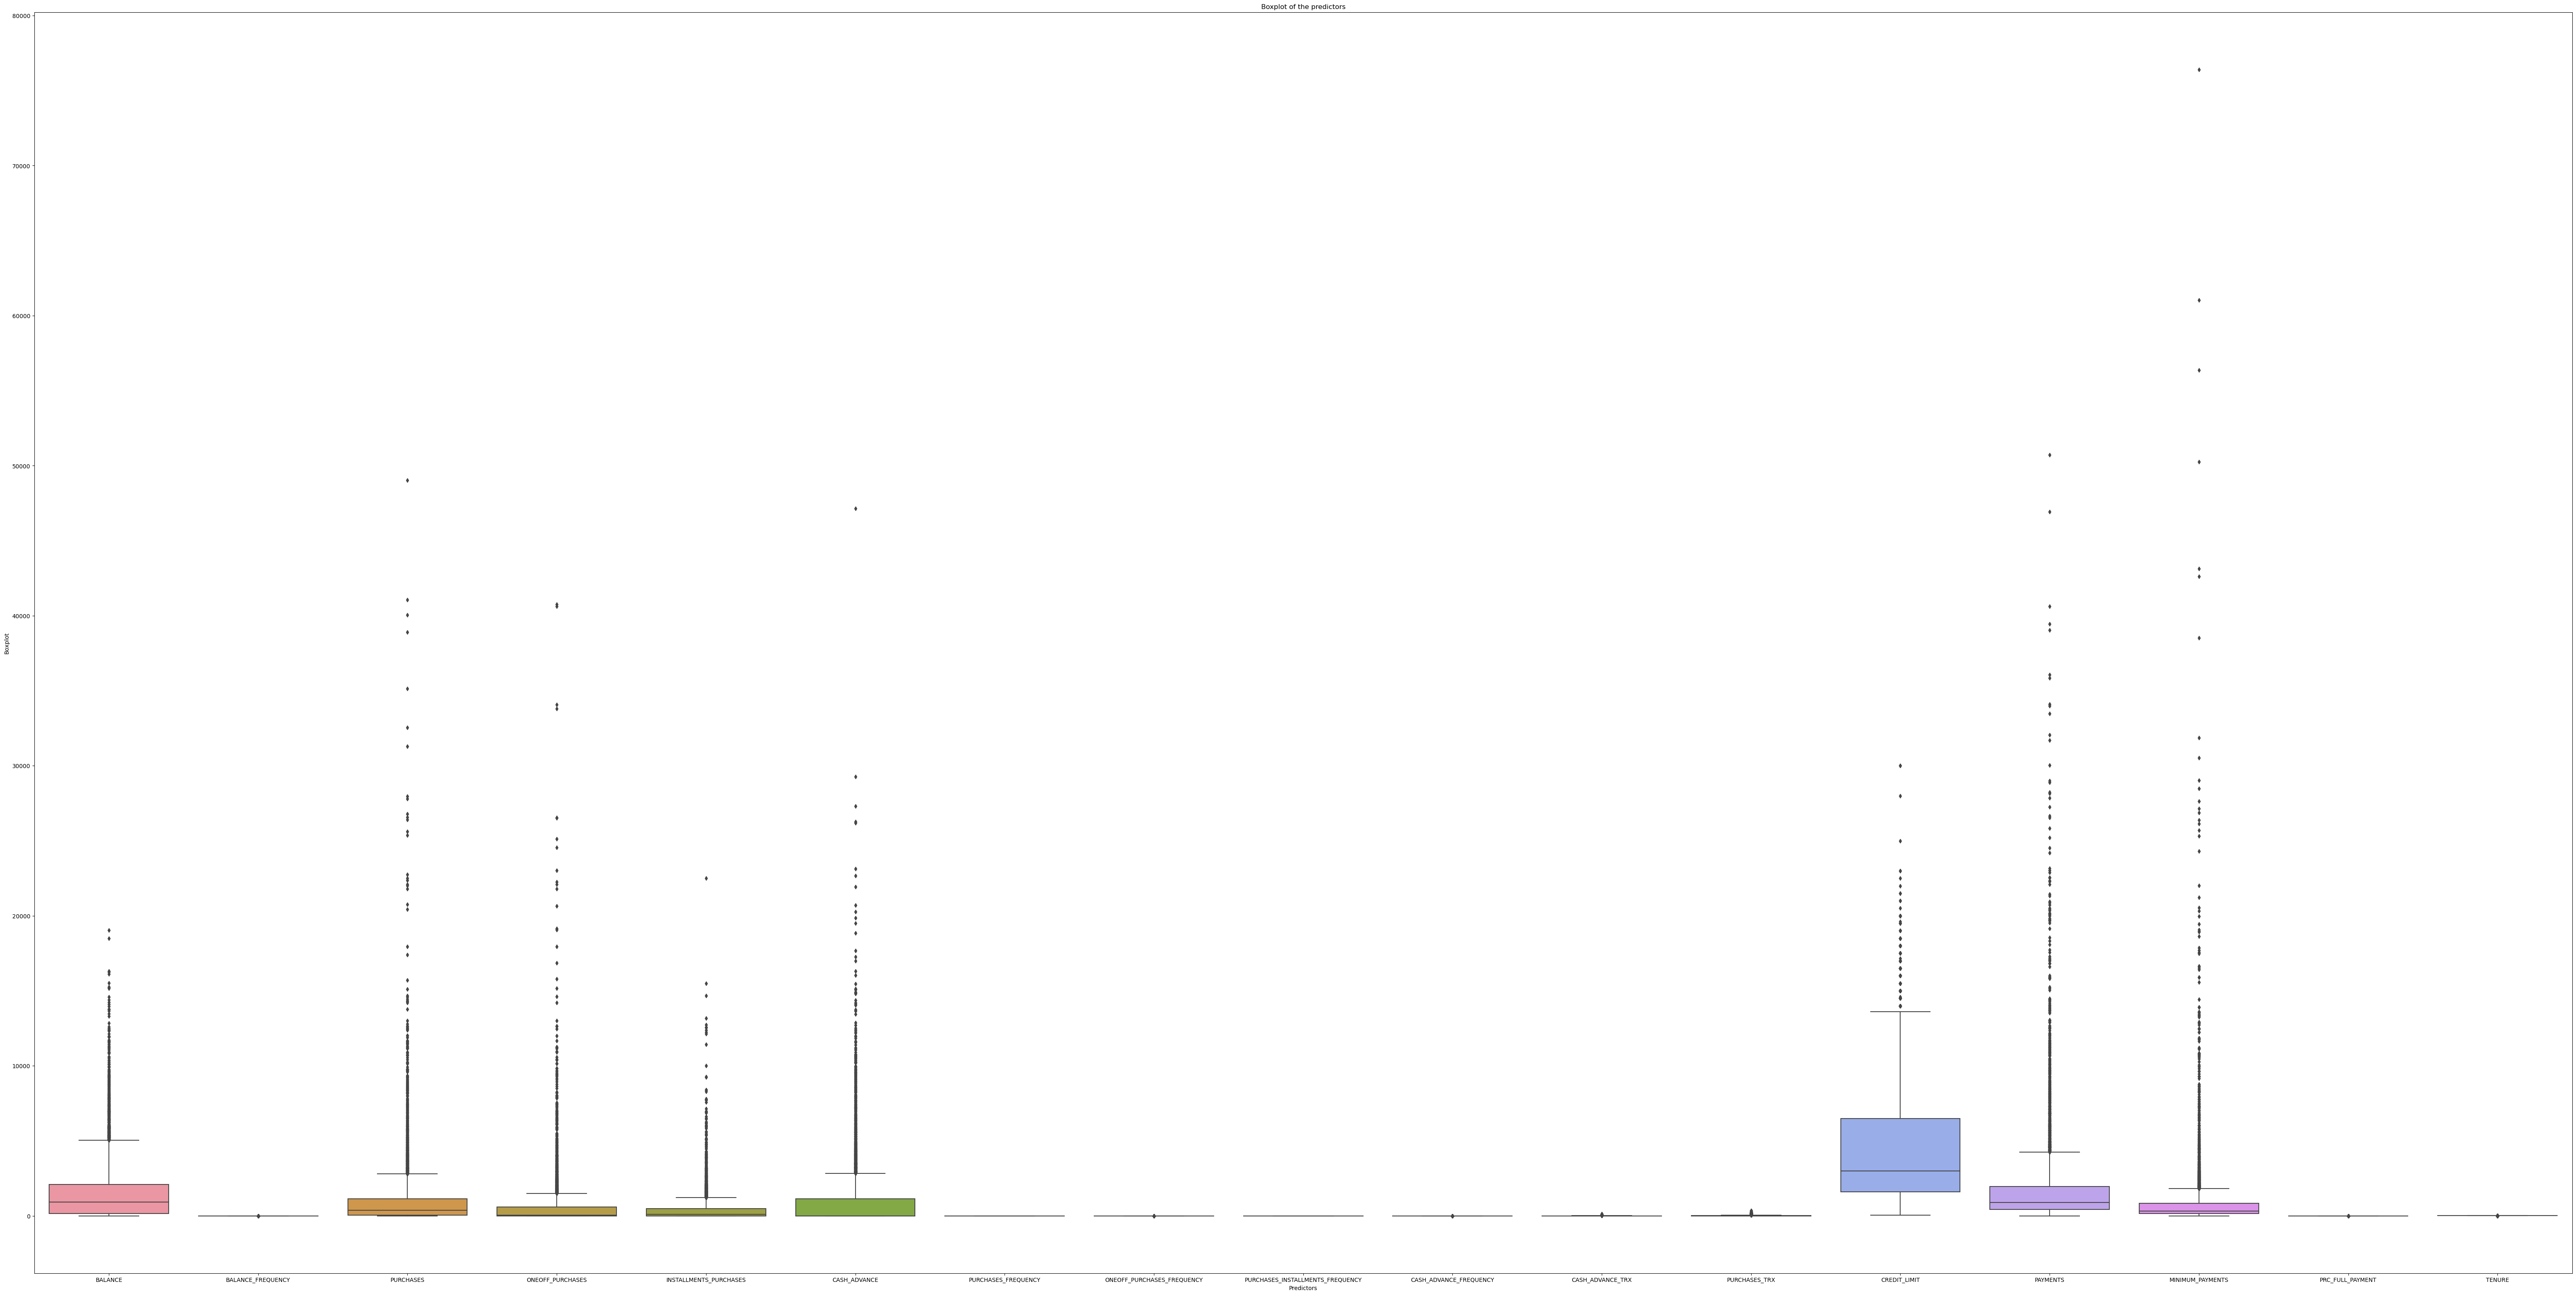

In [12]:
#Attempt to visualize outliers using box plot
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(80, 40))
sns.boxplot(data=df,ax=ax)
plt.xlabel("Predictors")
plt.ylabel("Boxplot")
plt.title("Boxplot of the predictors");

5) Data Analysis

<Axes: >

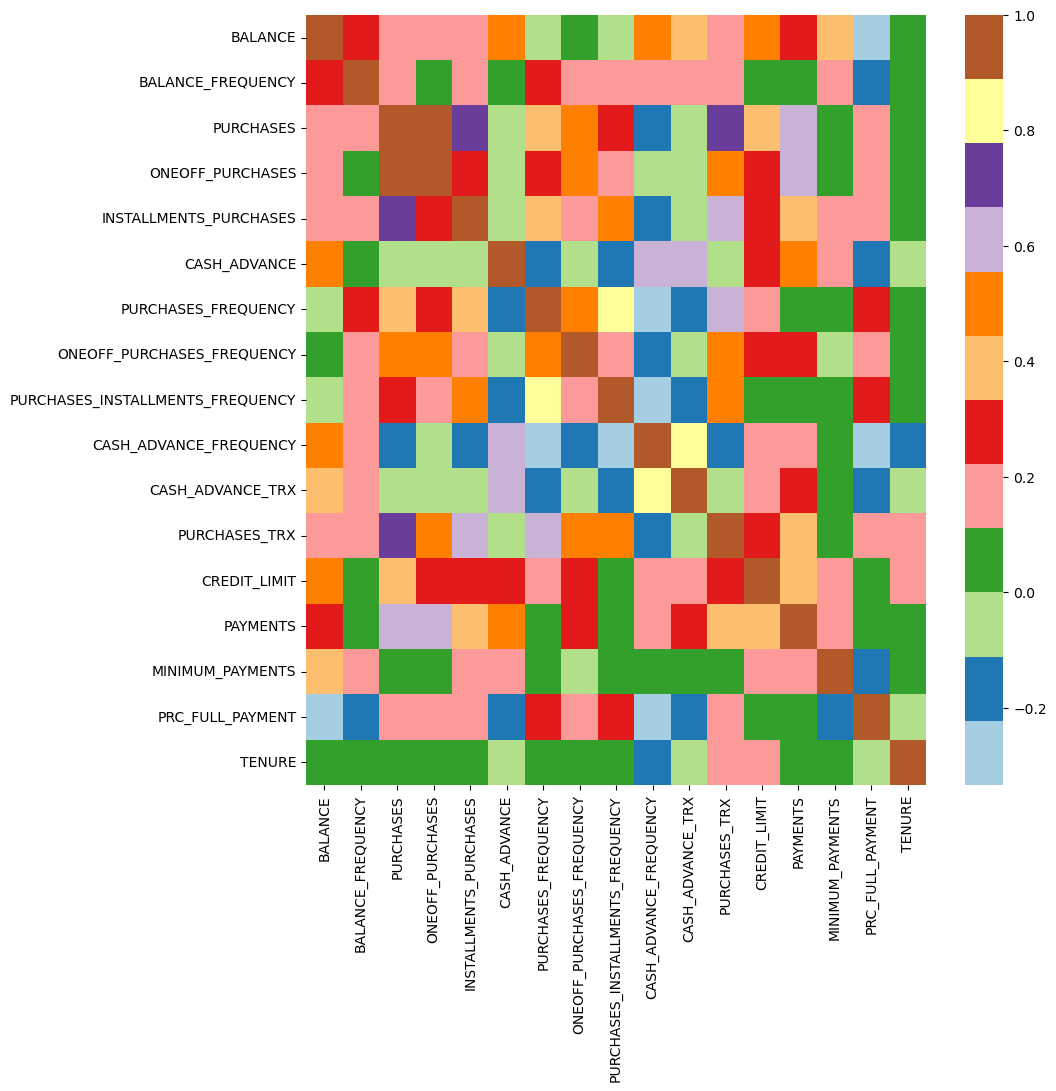

In [13]:
#check the correlation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Paired')

In [14]:
def distribution_plot(column):
    # Set the style for the plot (optional)
    sns.set(style="whitegrid")

    # Calculate the IQR to remove outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if len(df[column].value_counts()) <= 20:
        plt.figure(figsize=(10, 10))
        #ax=df[column].value_counts().plot(kind='bar')
        ax=sns.histplot(df[column],color='g')
        ax.bar_label(ax.containers[0])
        plt.show()
    else:
        # Remove outliers
        filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # Create a histogram to visualize income distribution for default and non-default customers
        plt.figure(figsize=(25, 10))
        ax=sns.histplot(filtered_df[column],color='g')
        #ax=filtered_df[column].value_counts().plot(kind='bar')
        ax.bar_label(ax.containers[0])
        plt.show()

Univariate Analysis

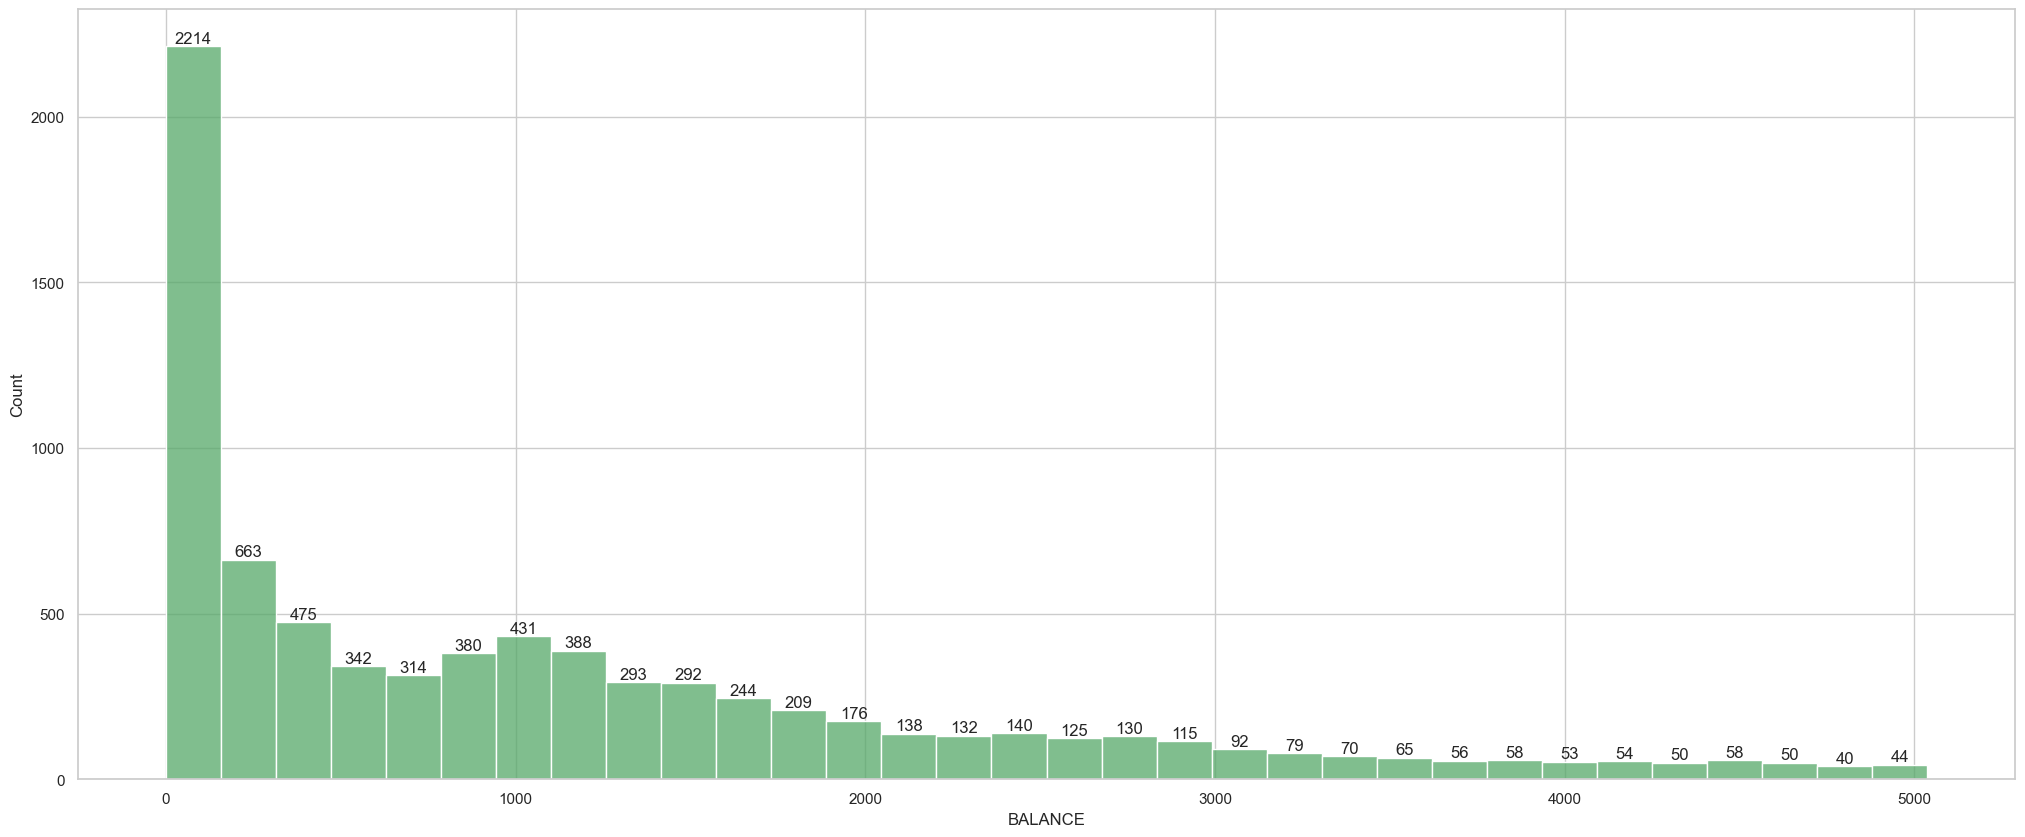

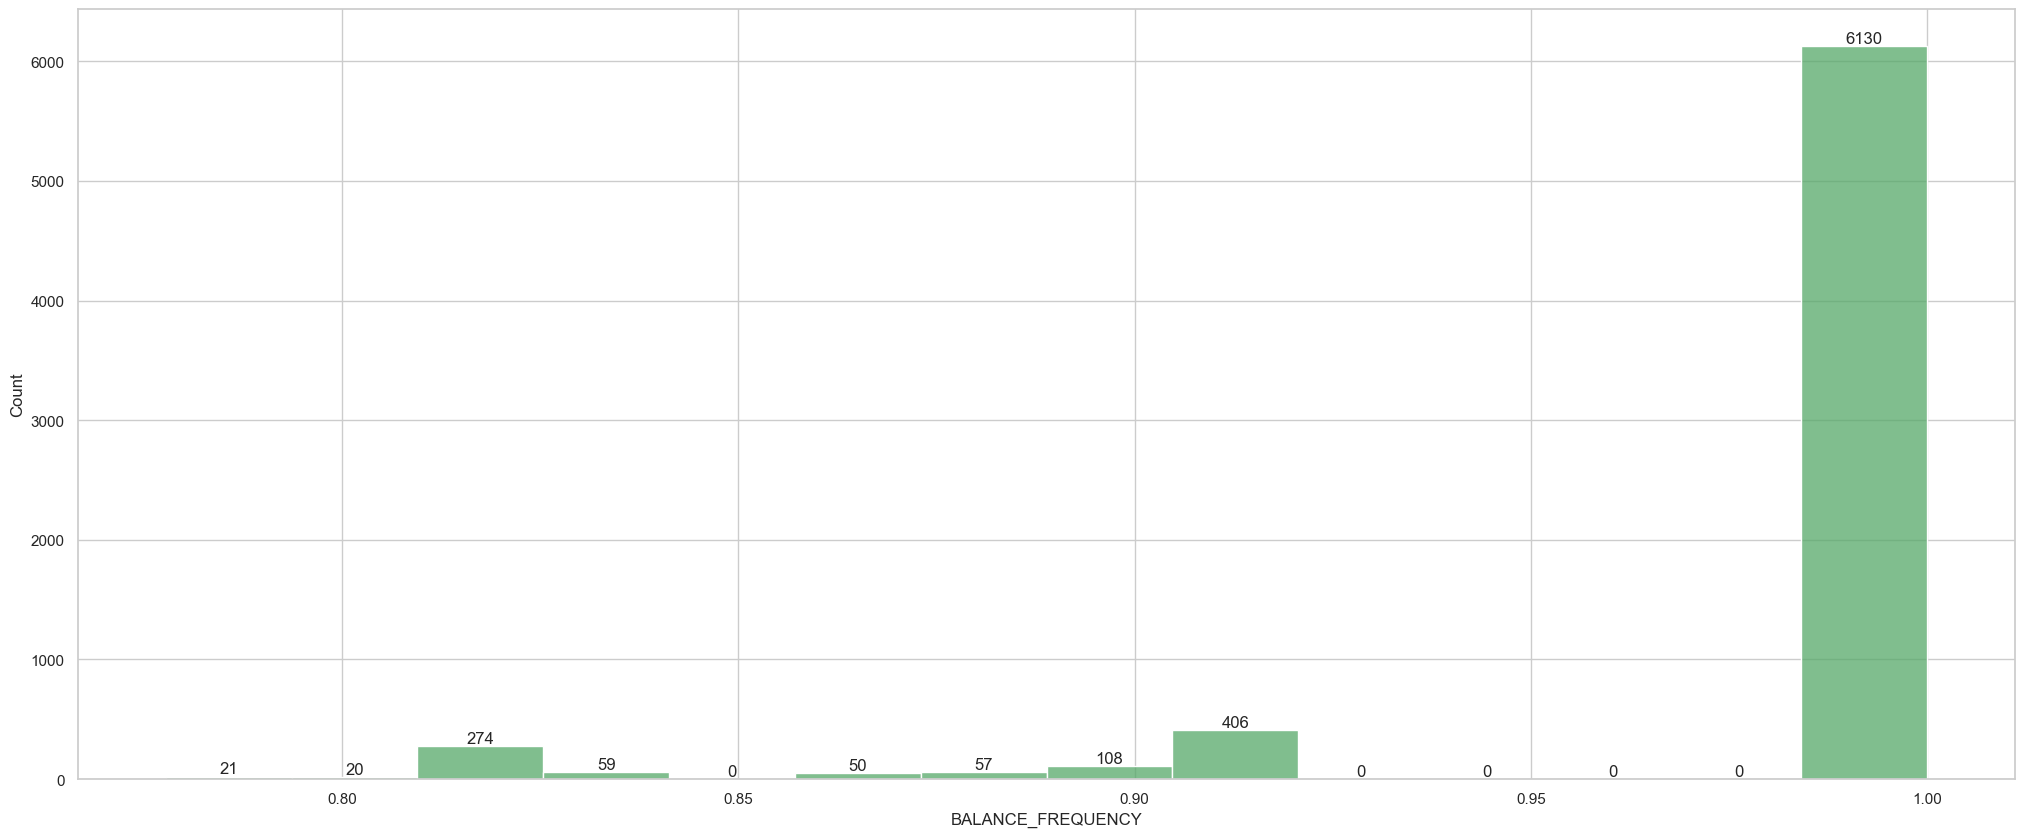

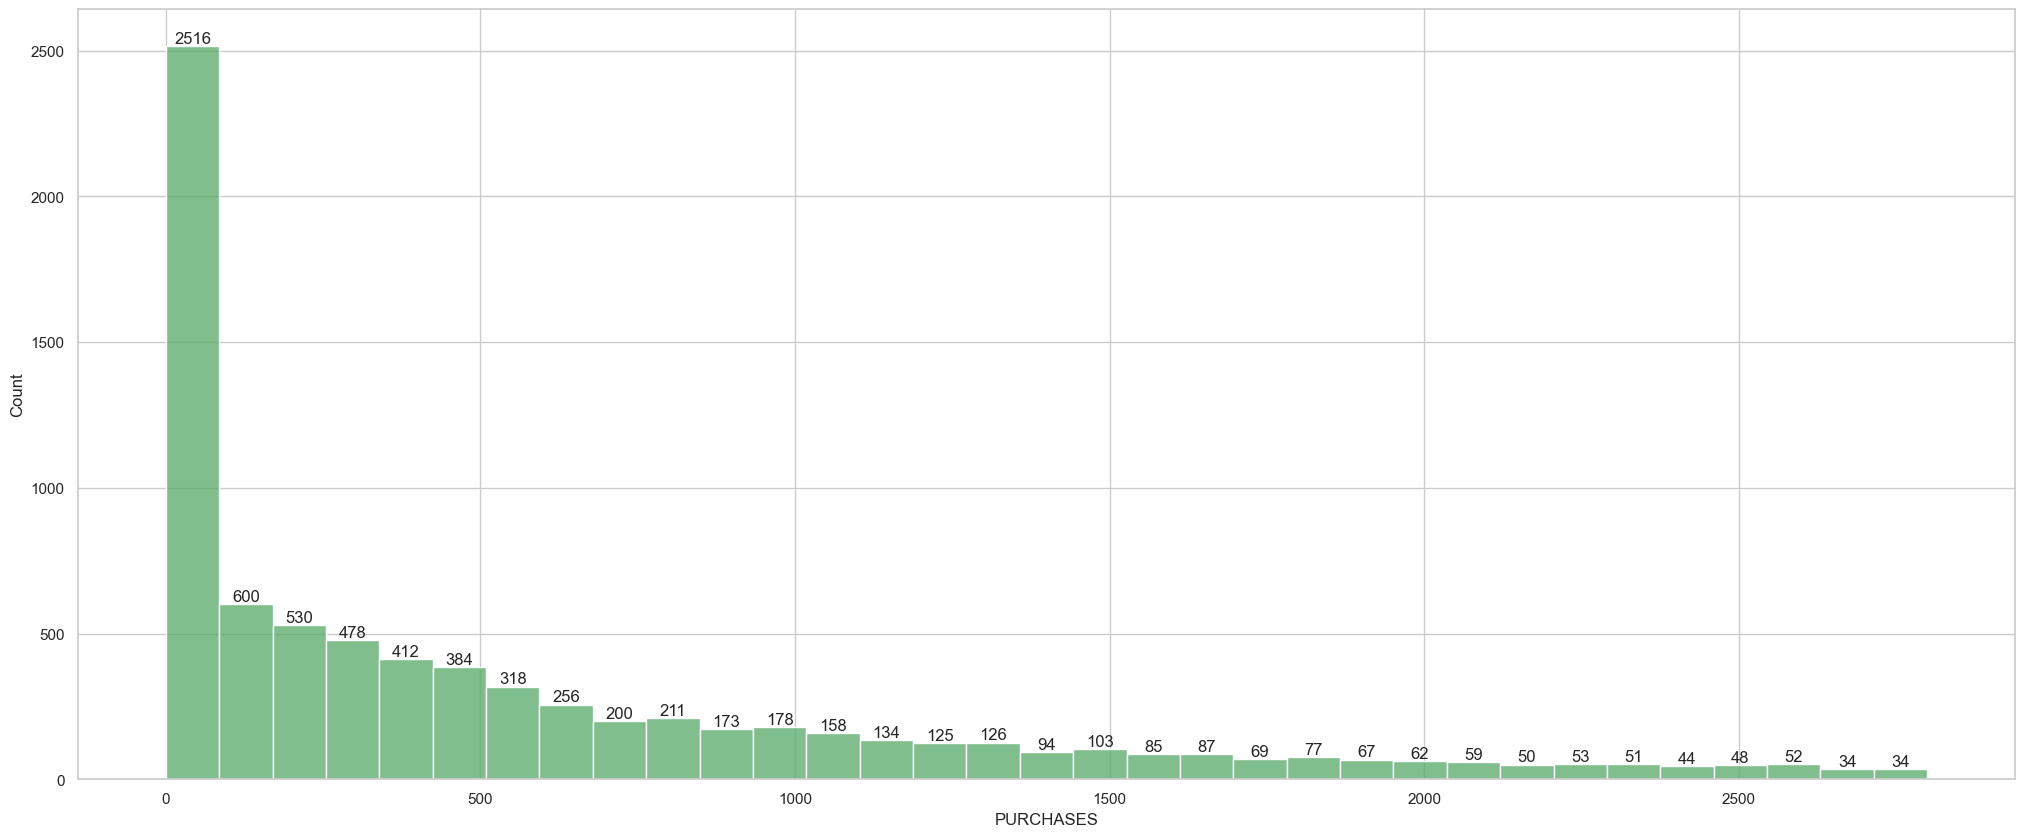

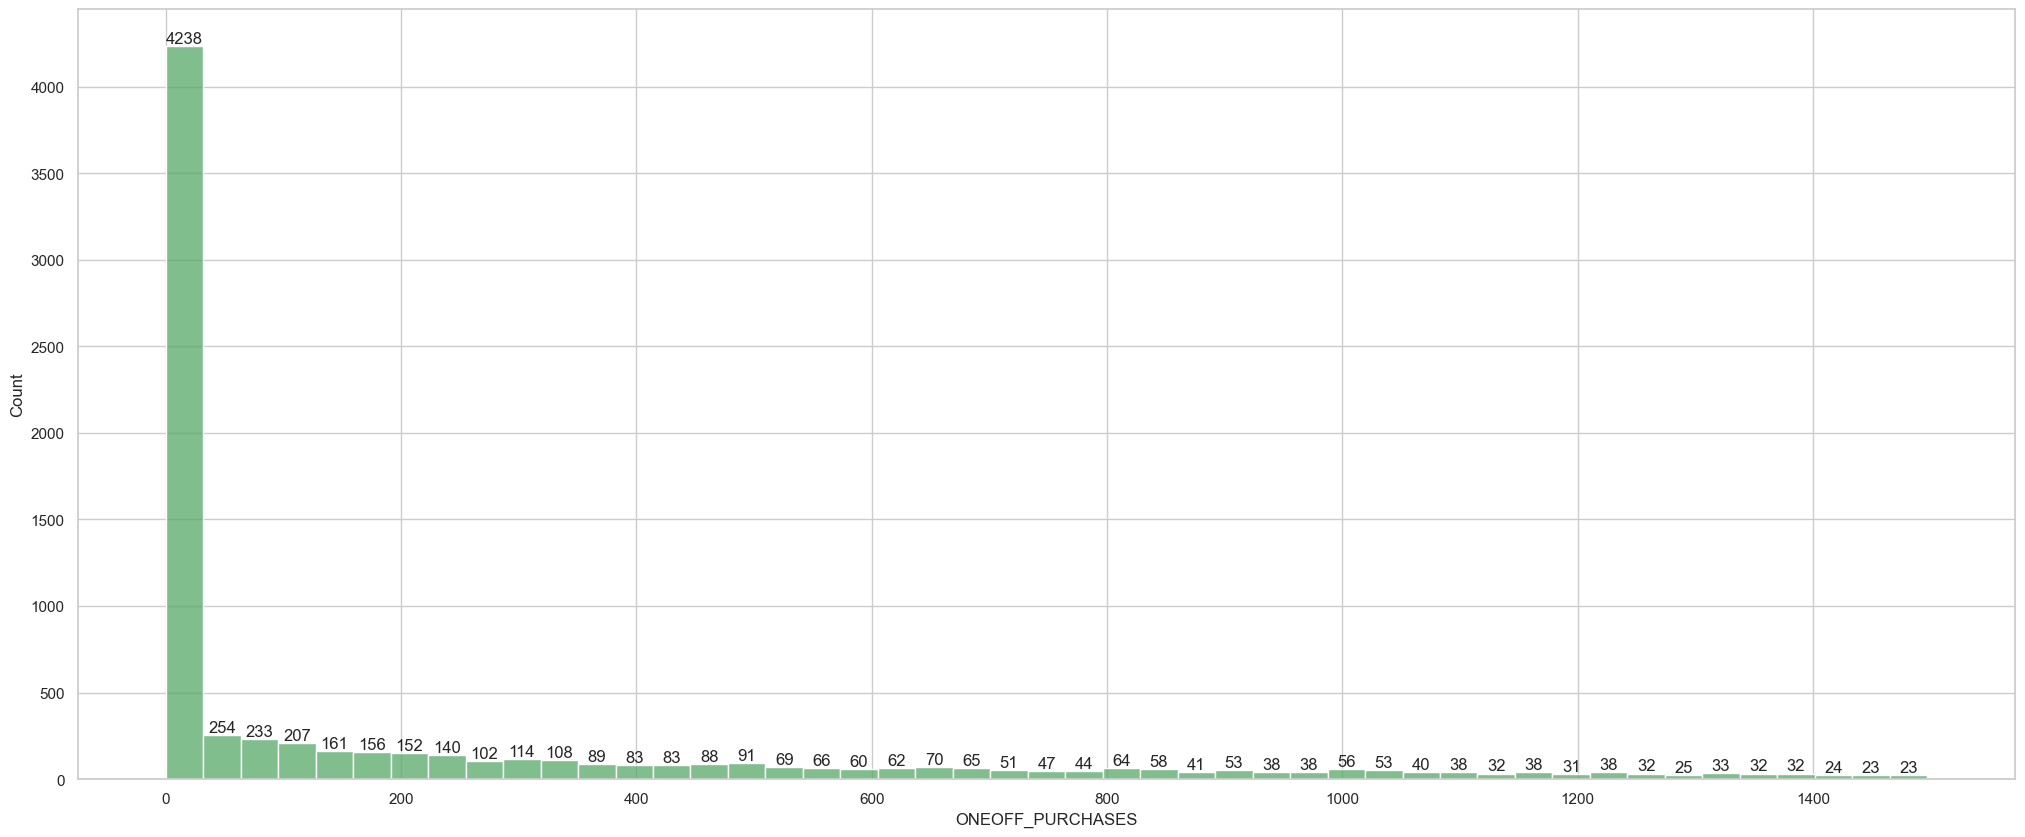

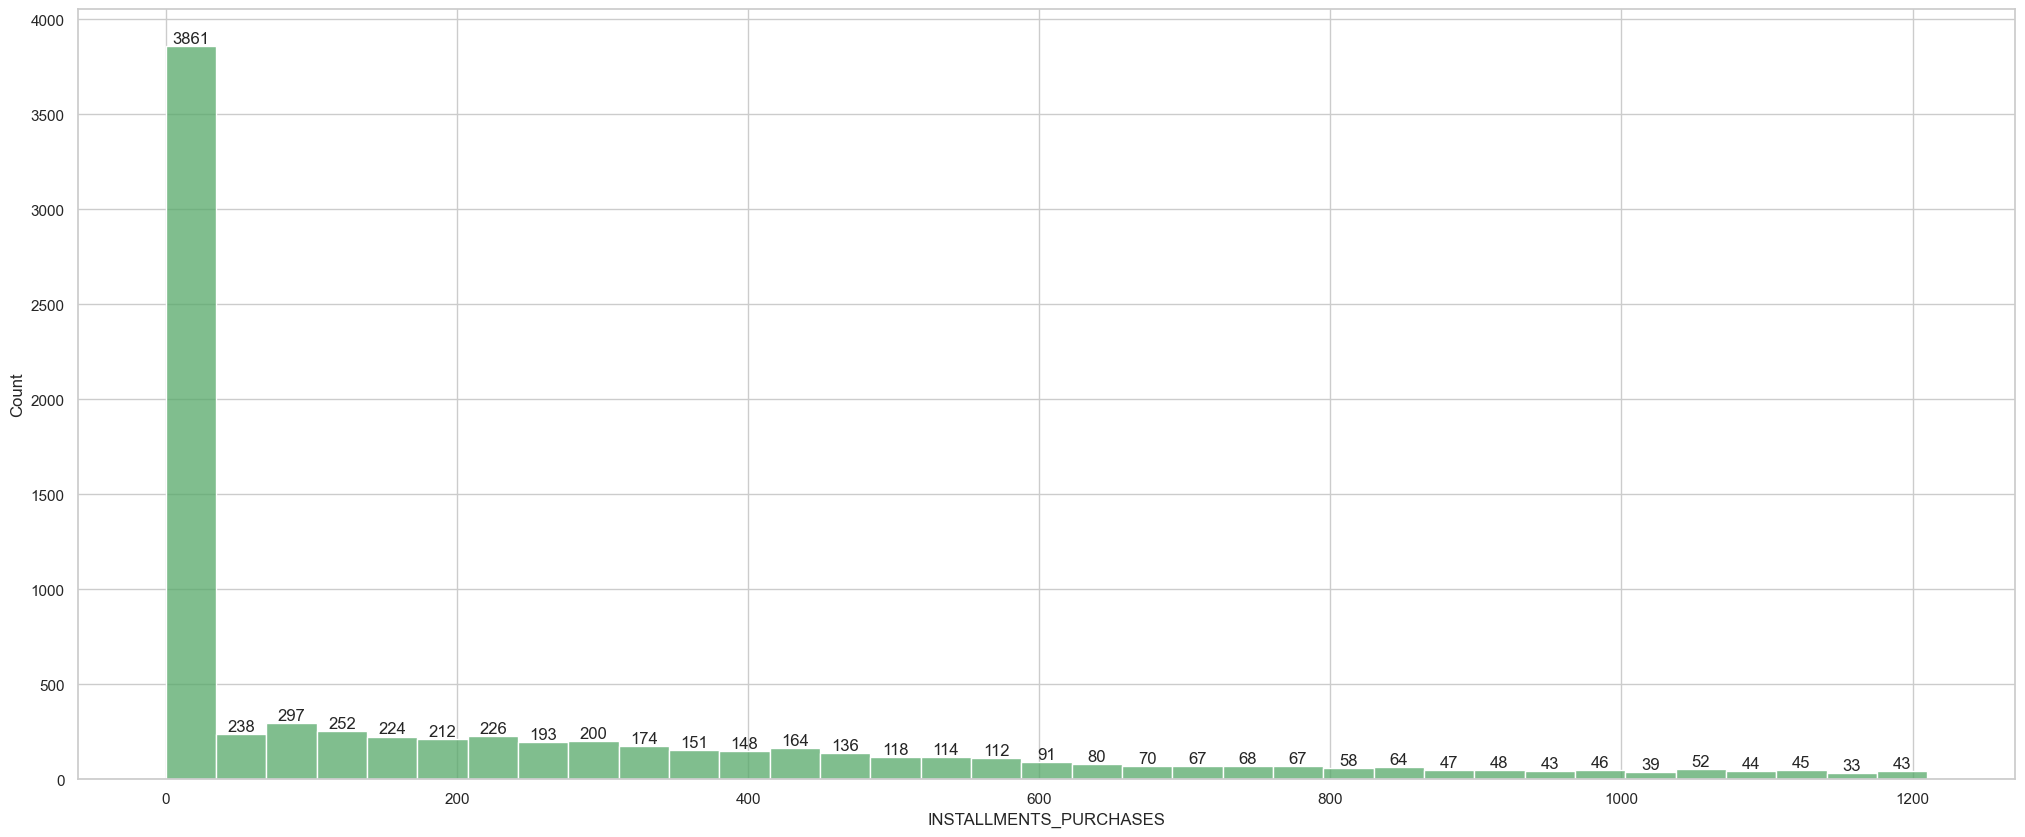

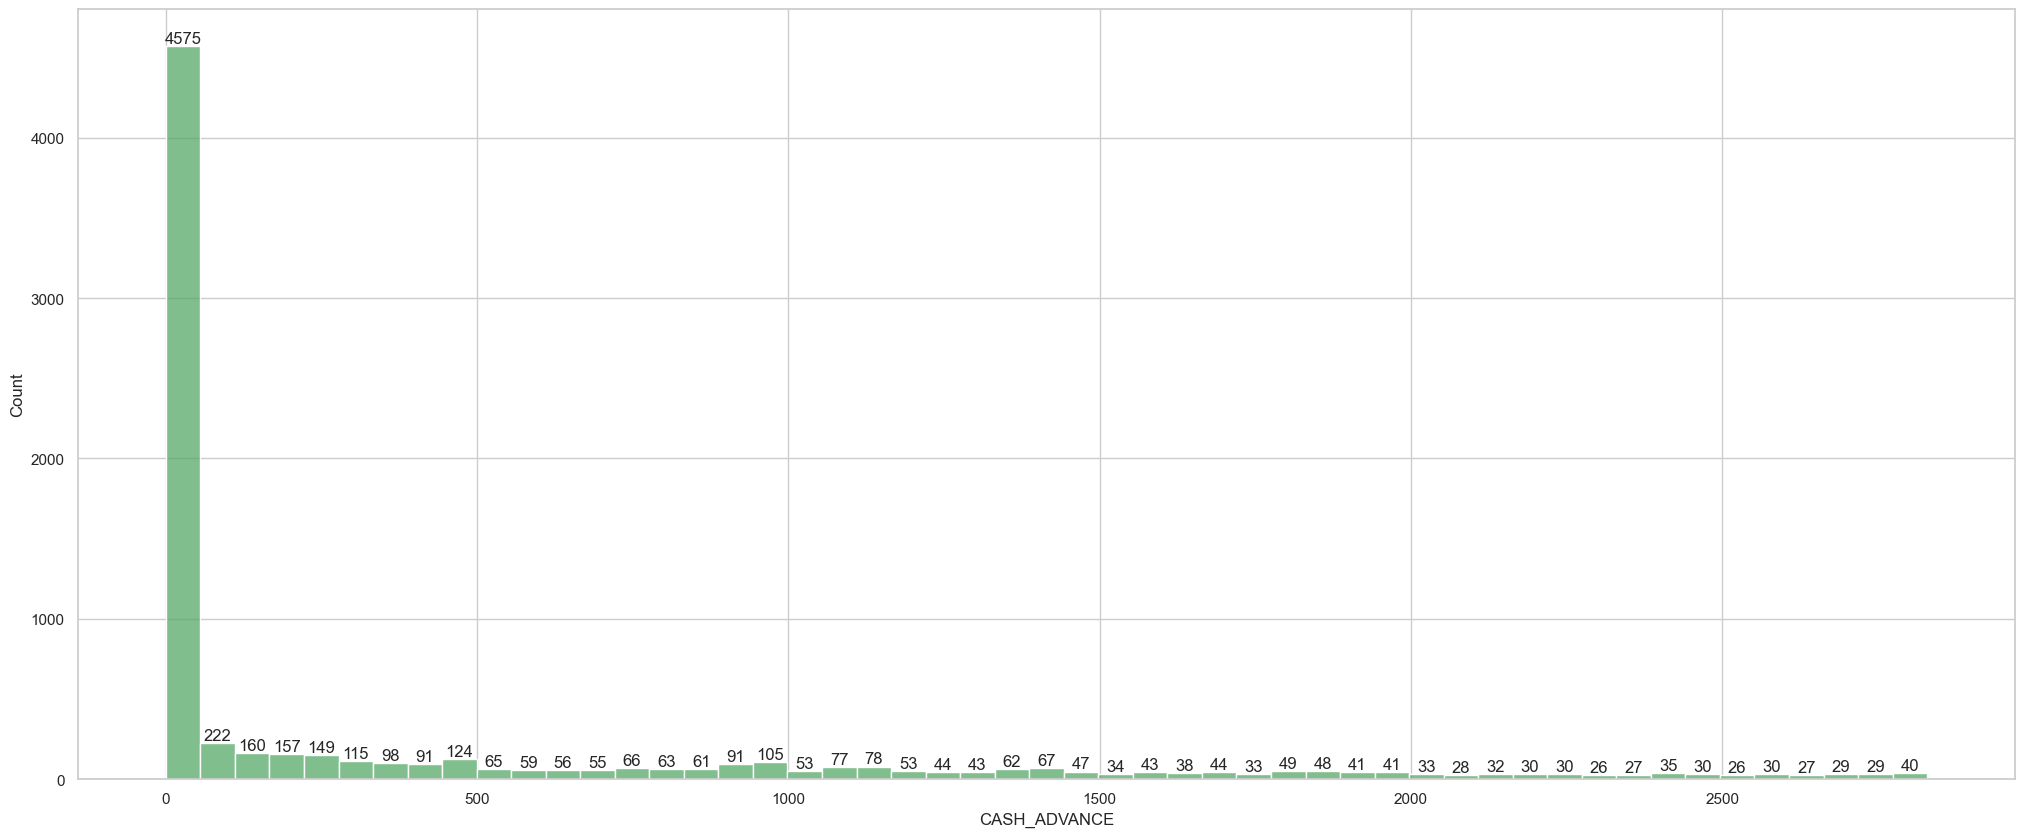

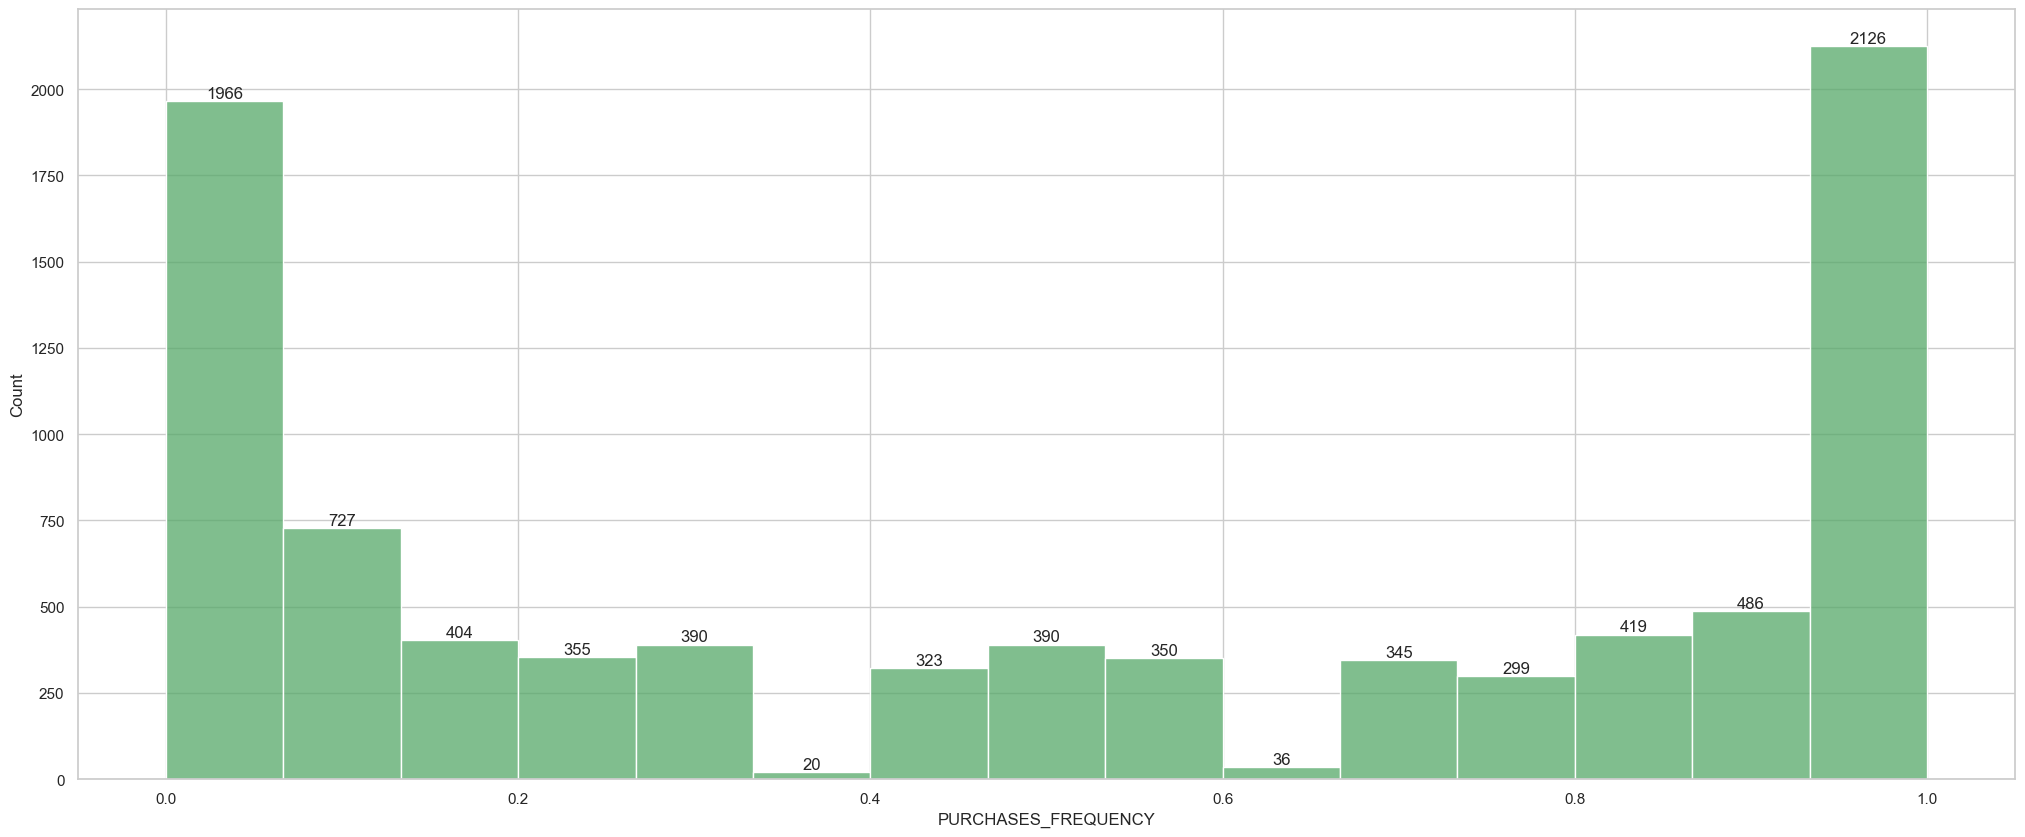

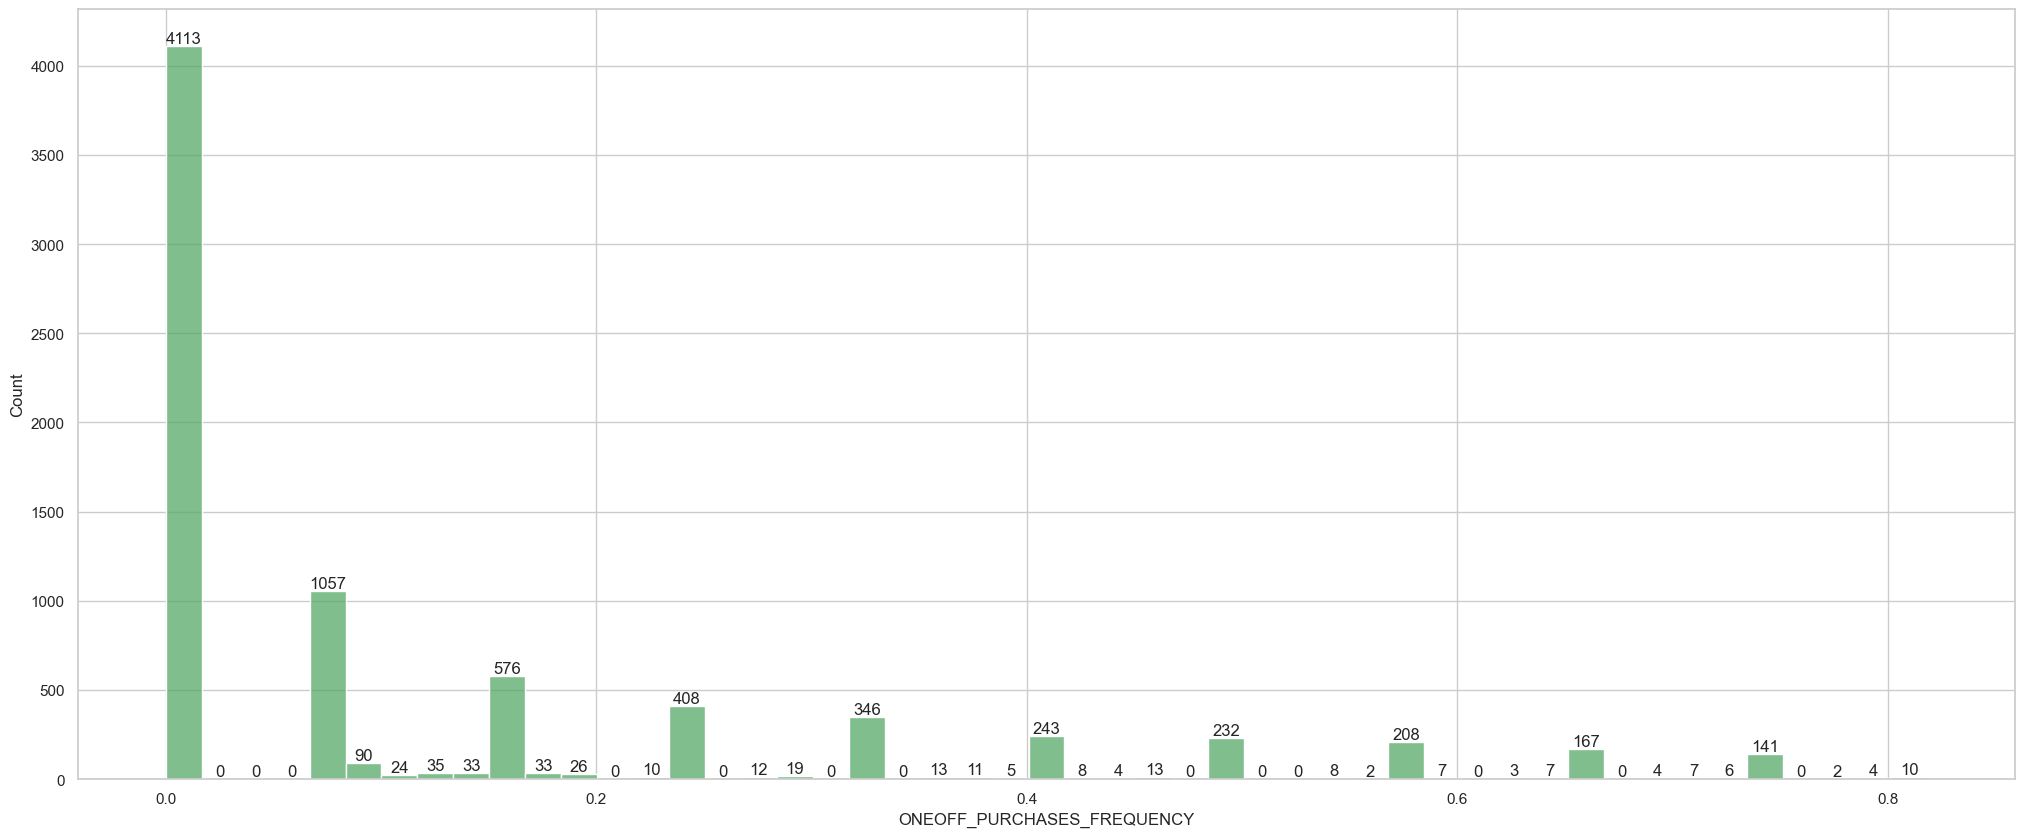

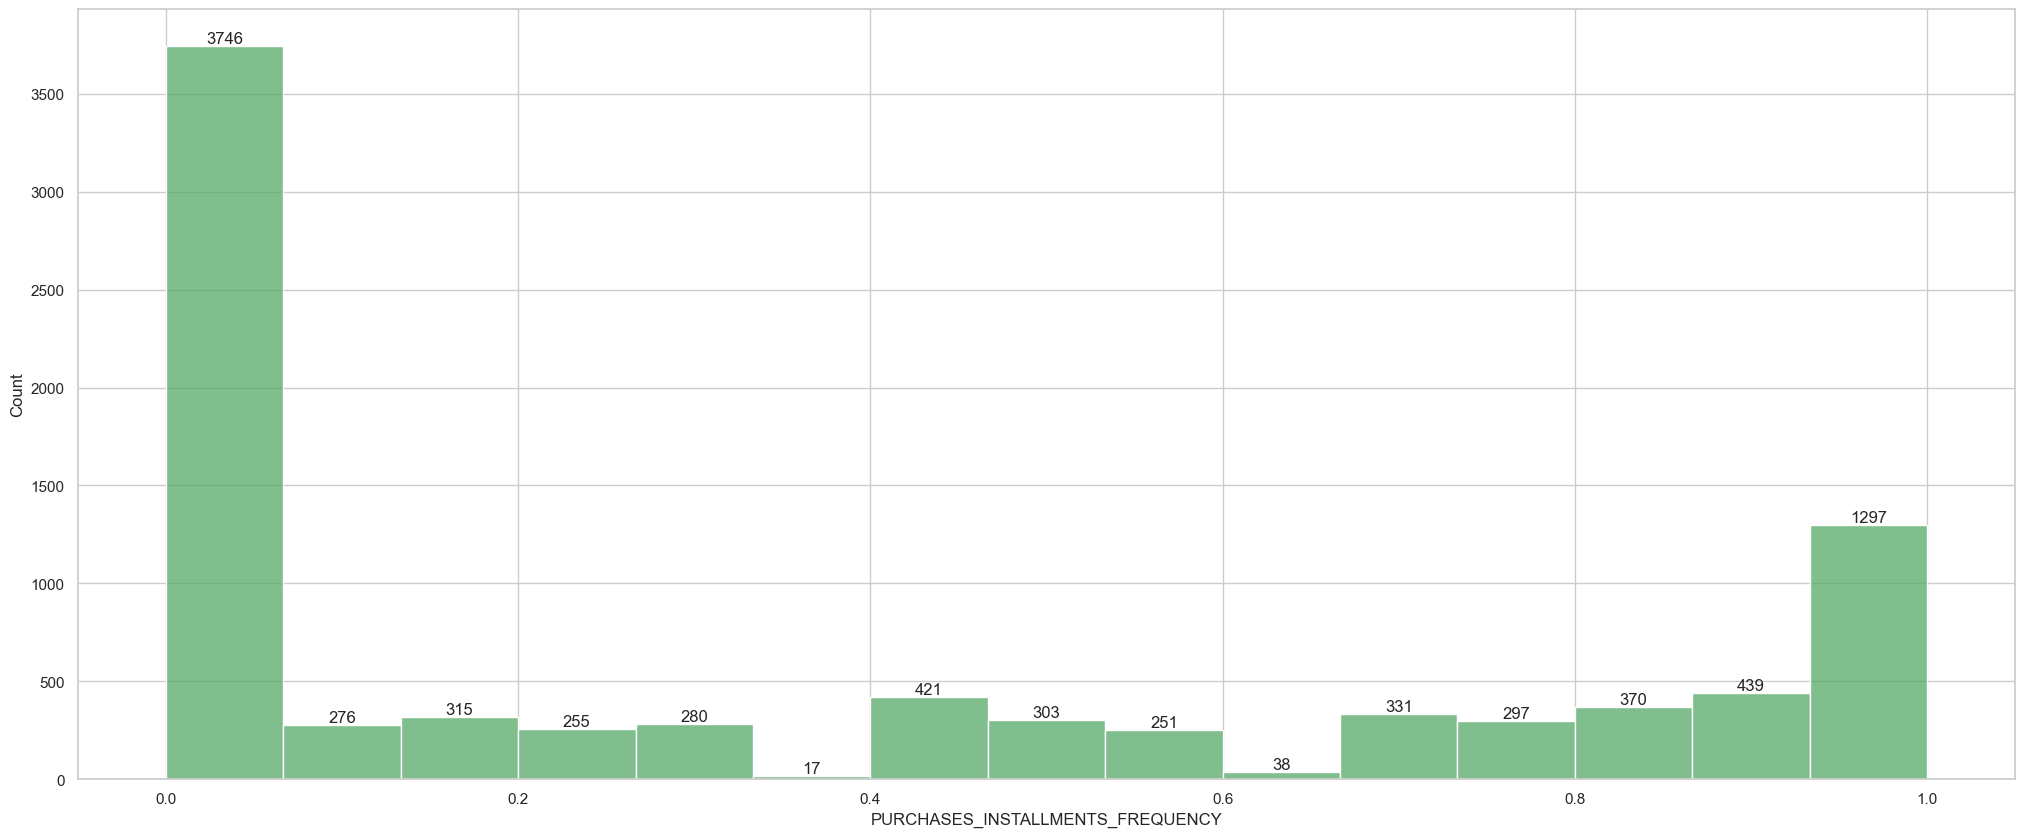

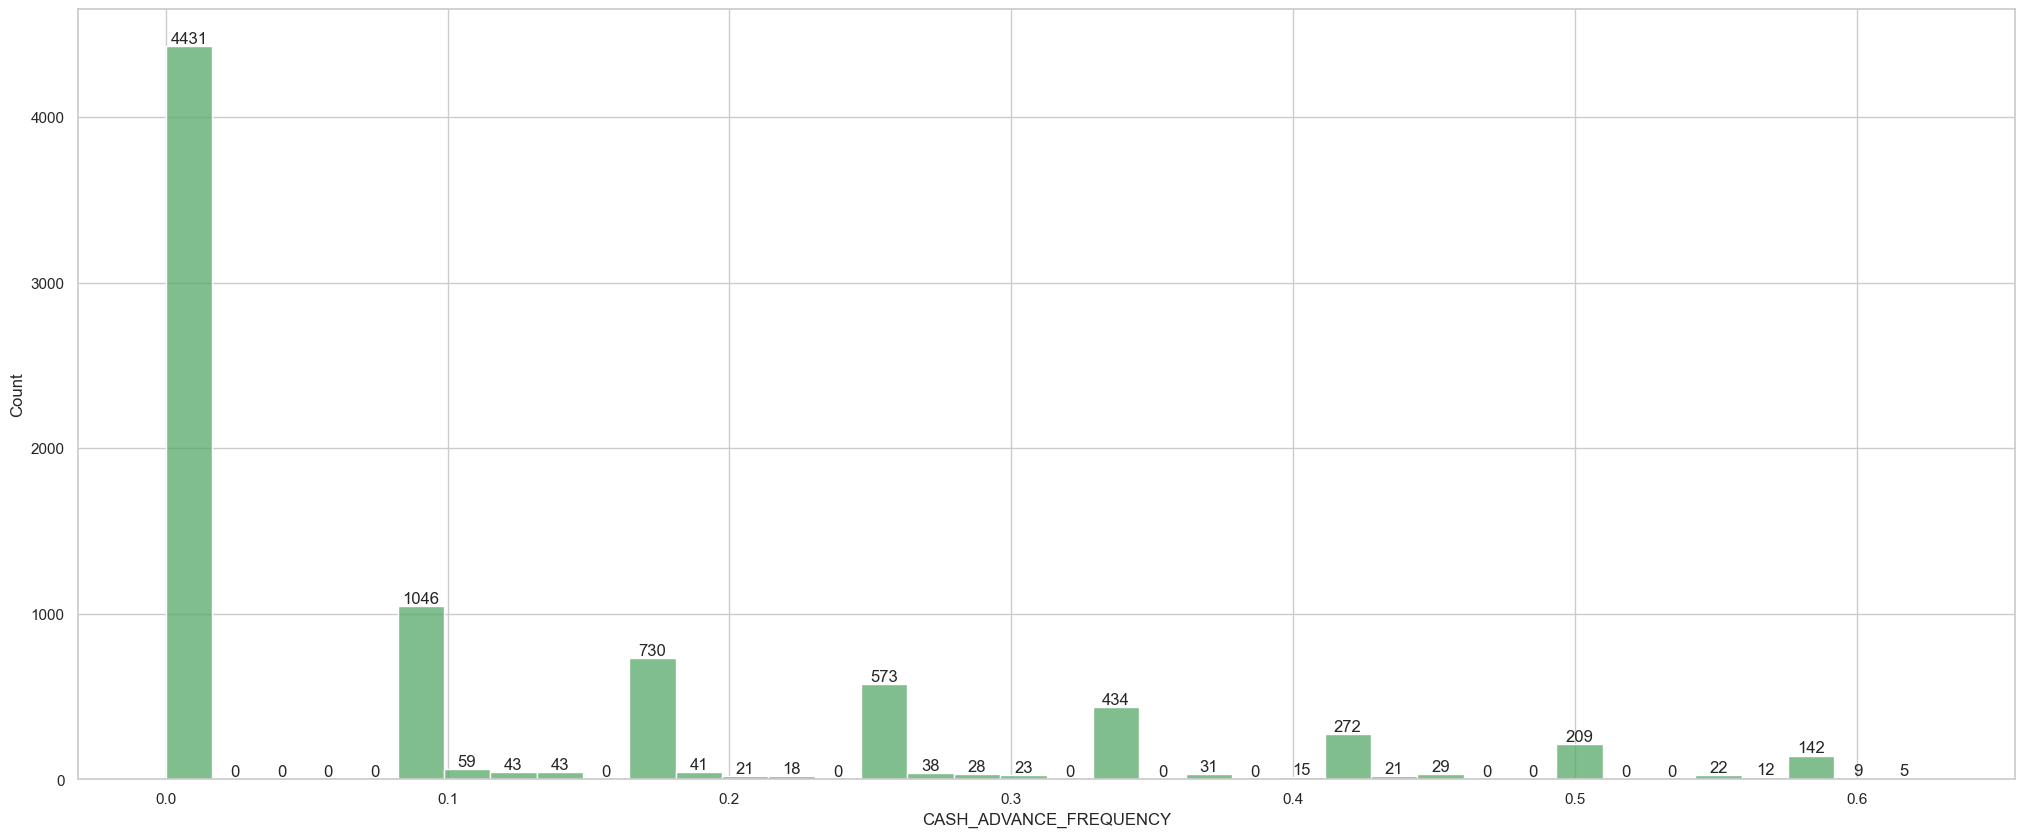

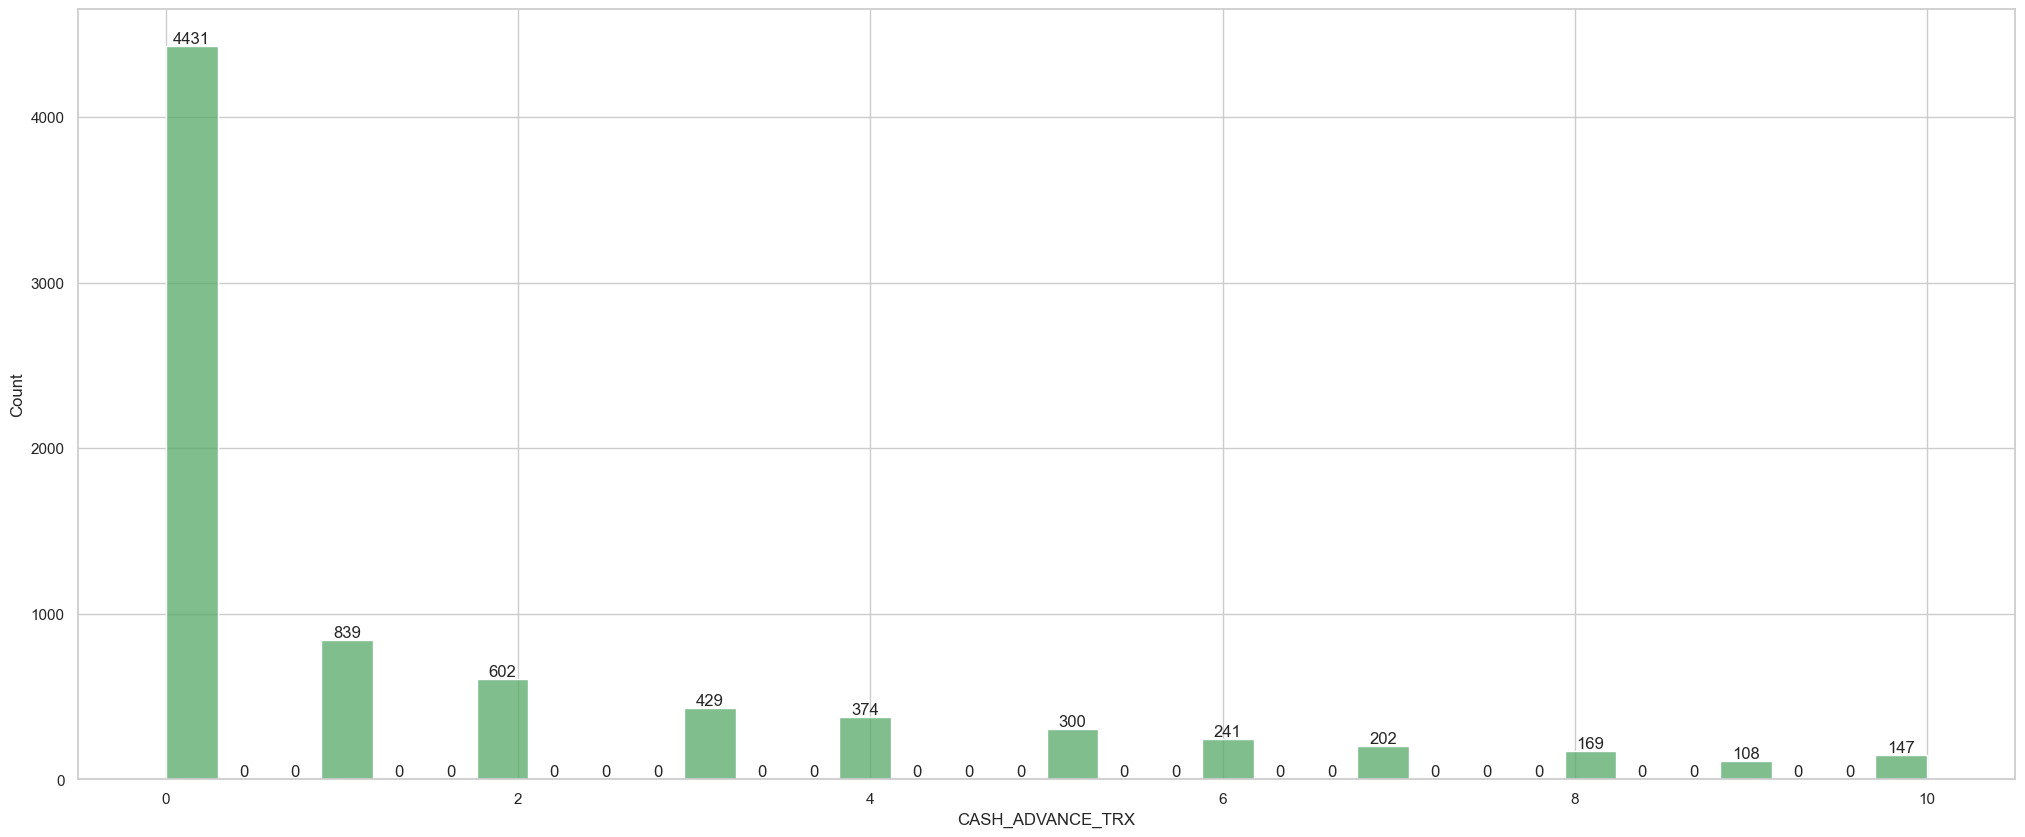

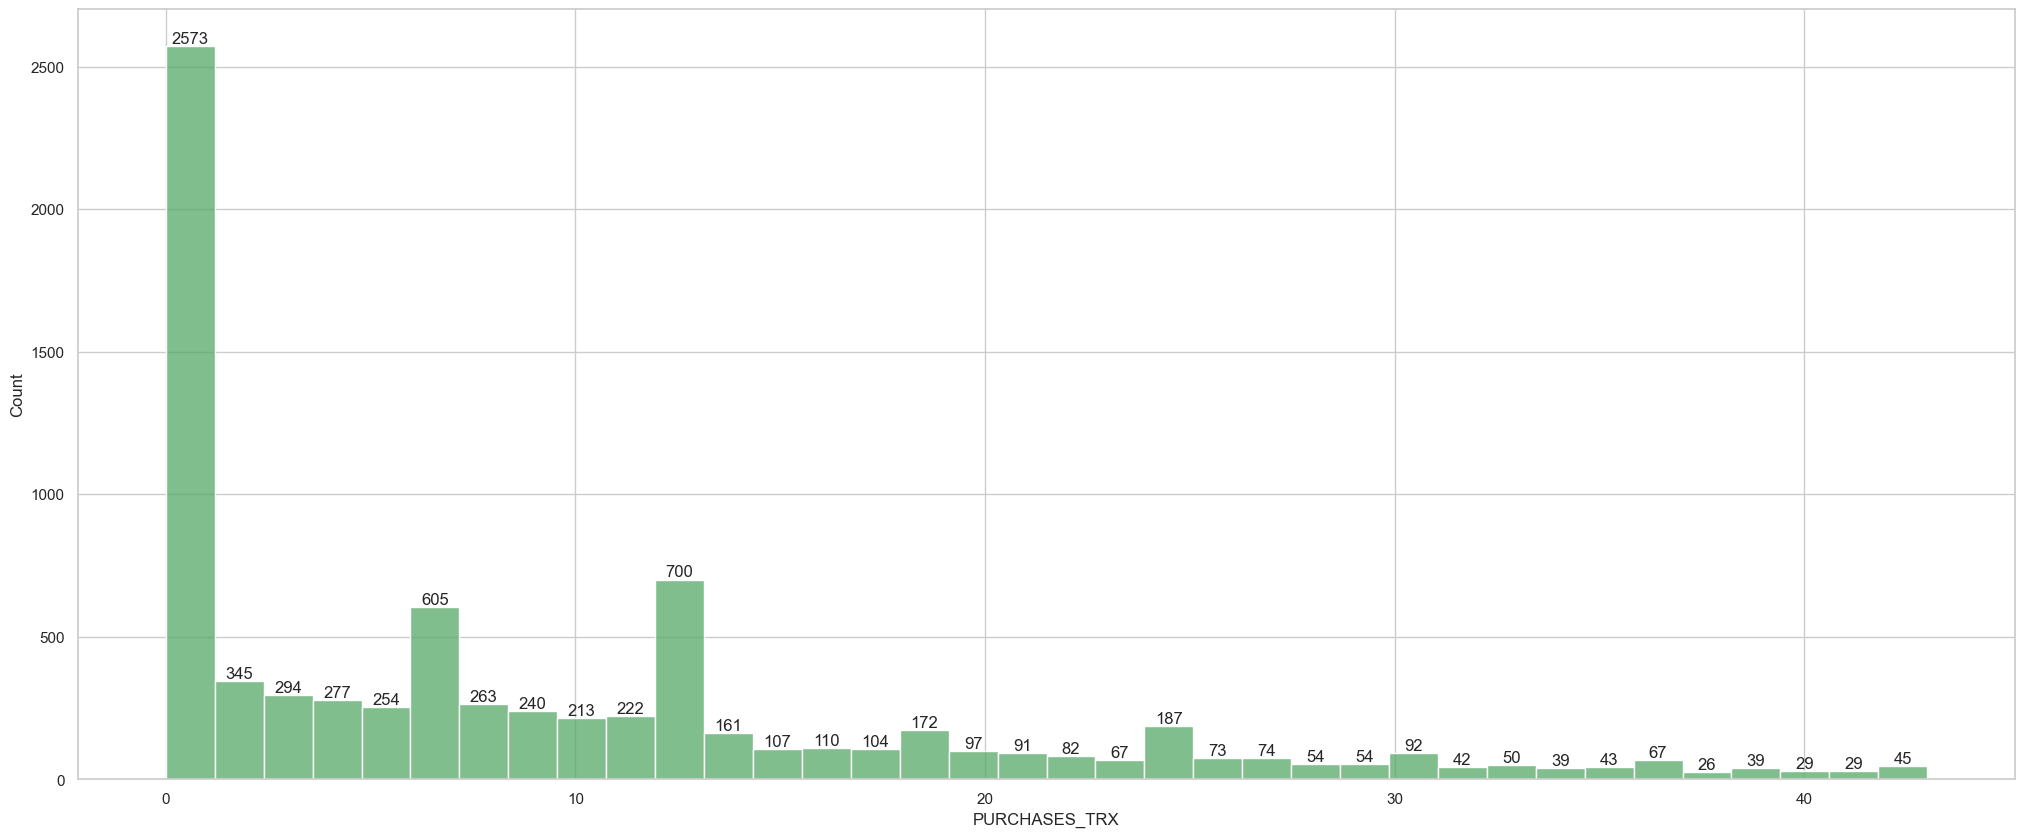

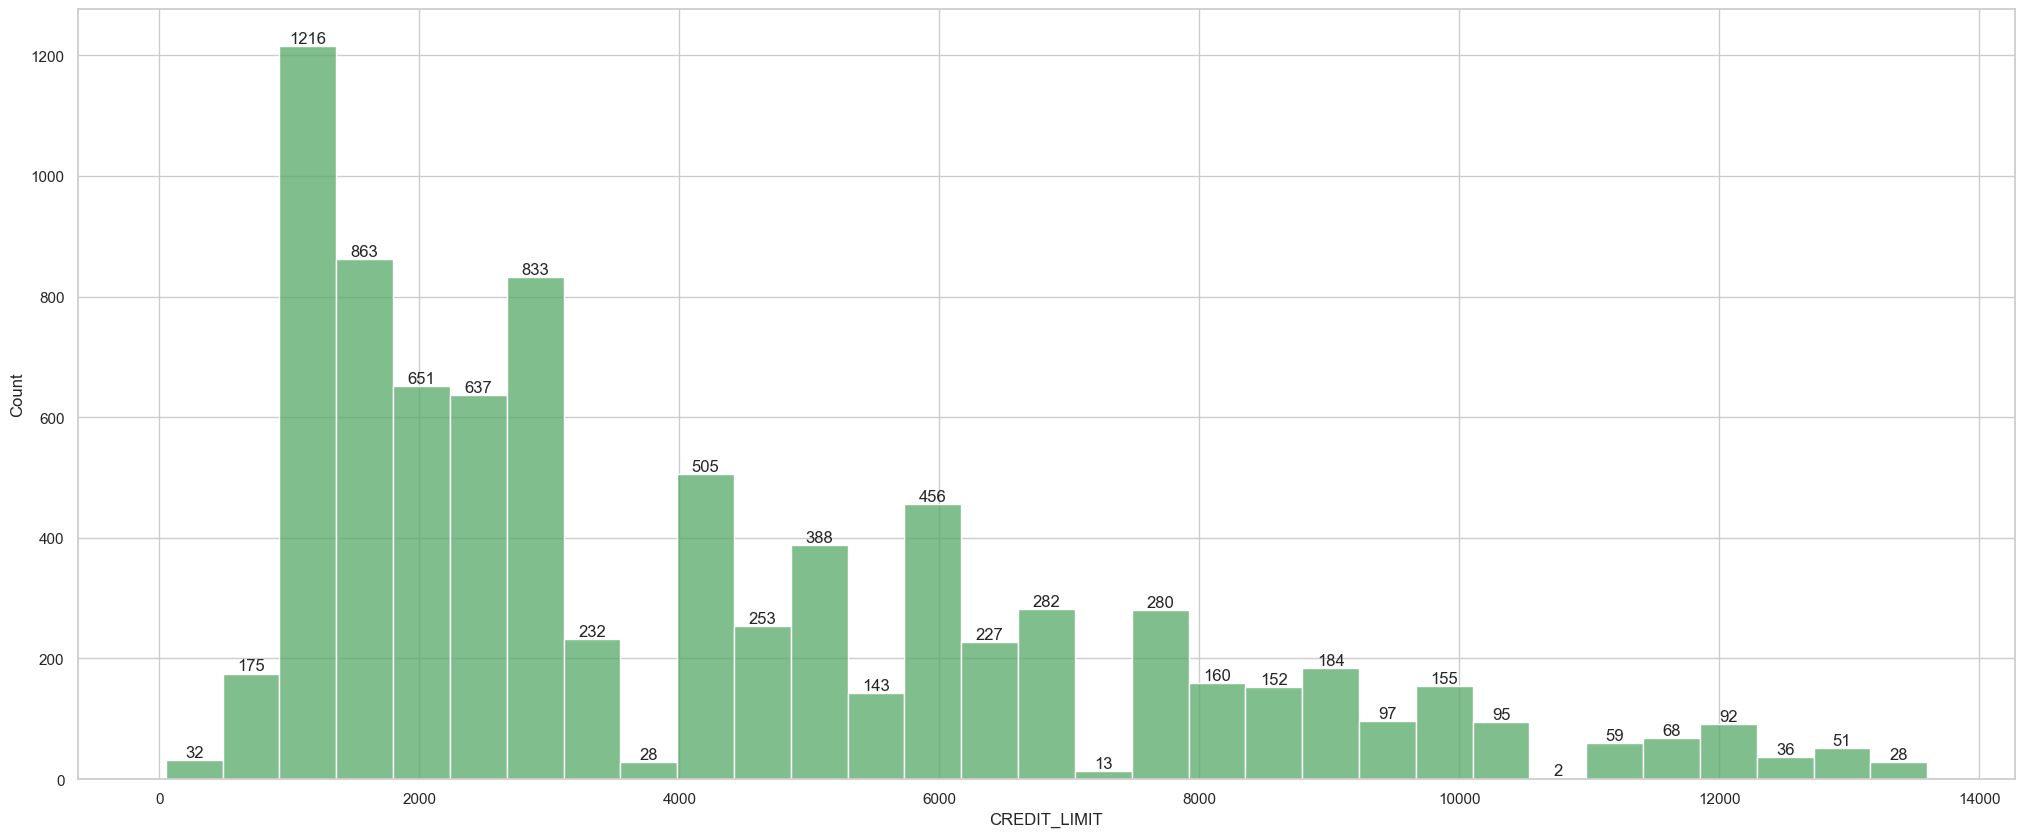

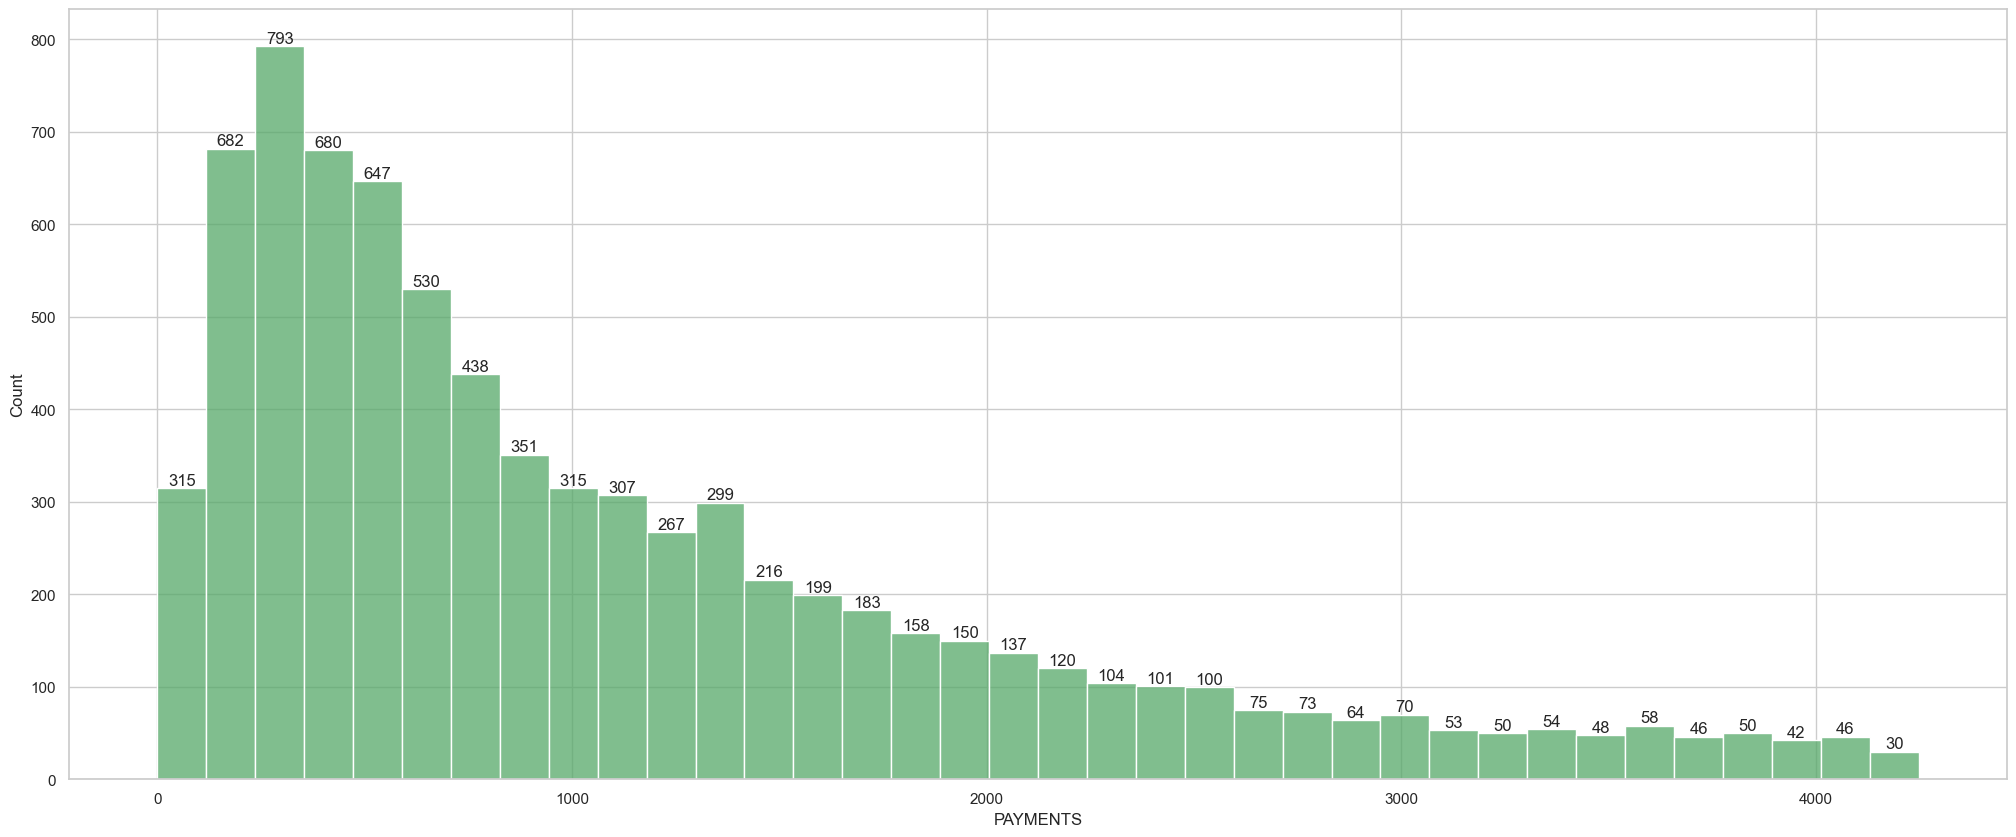

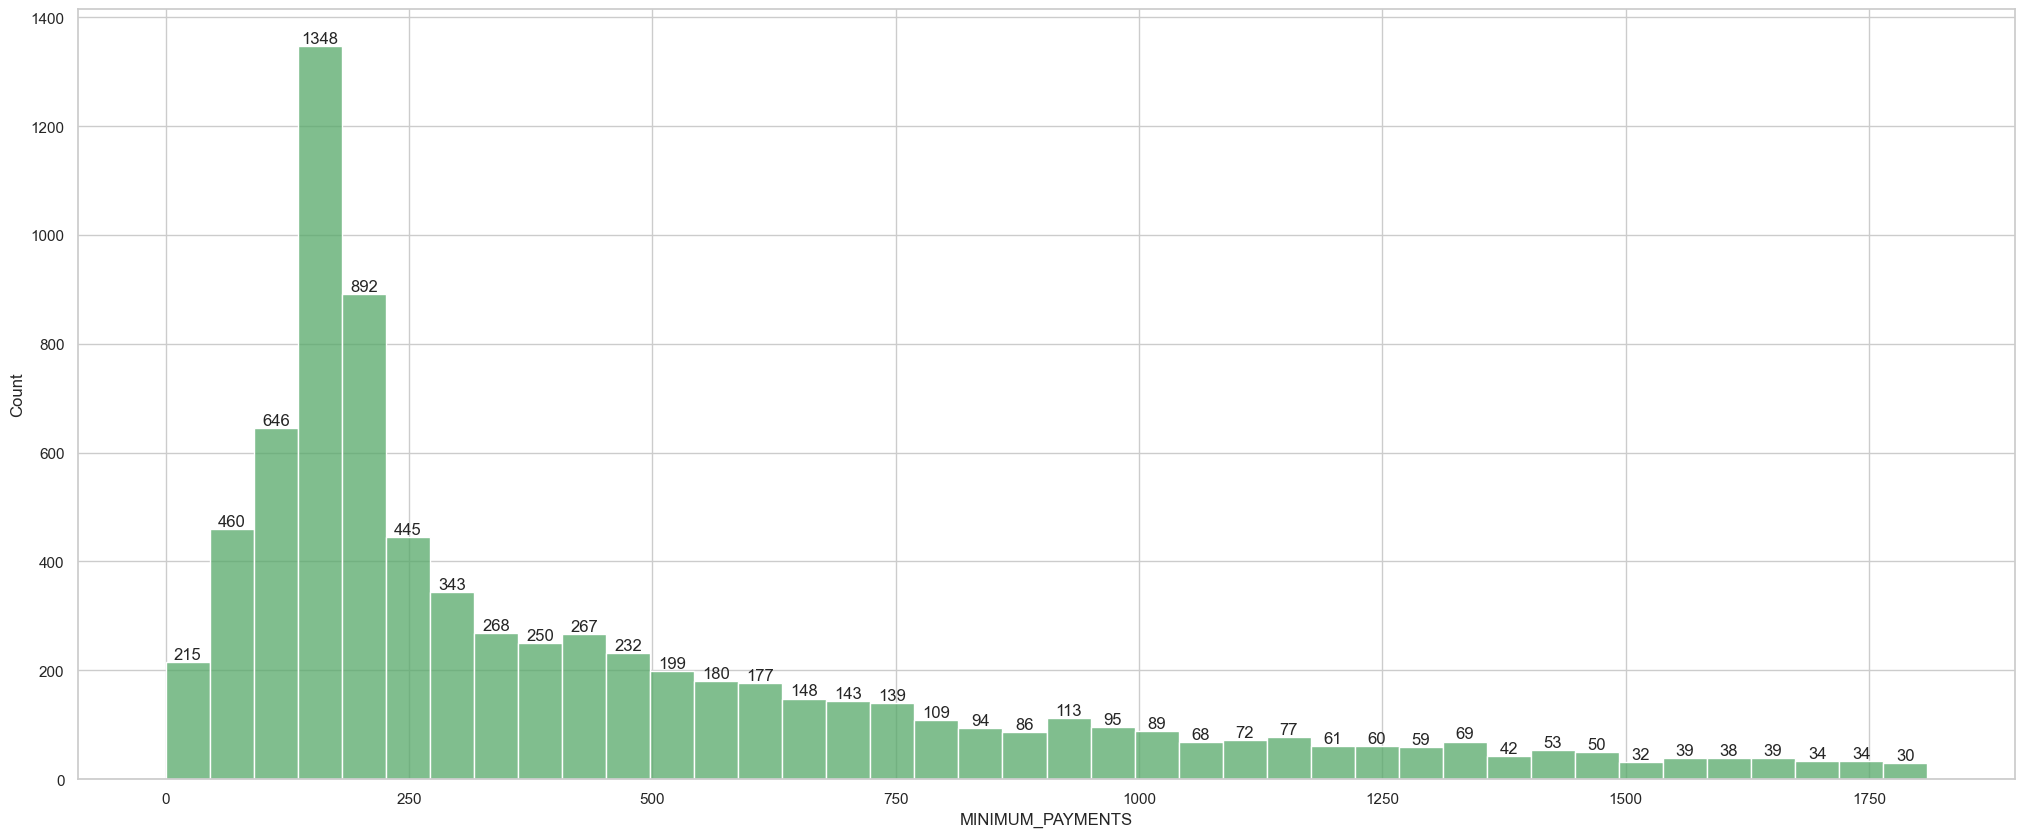

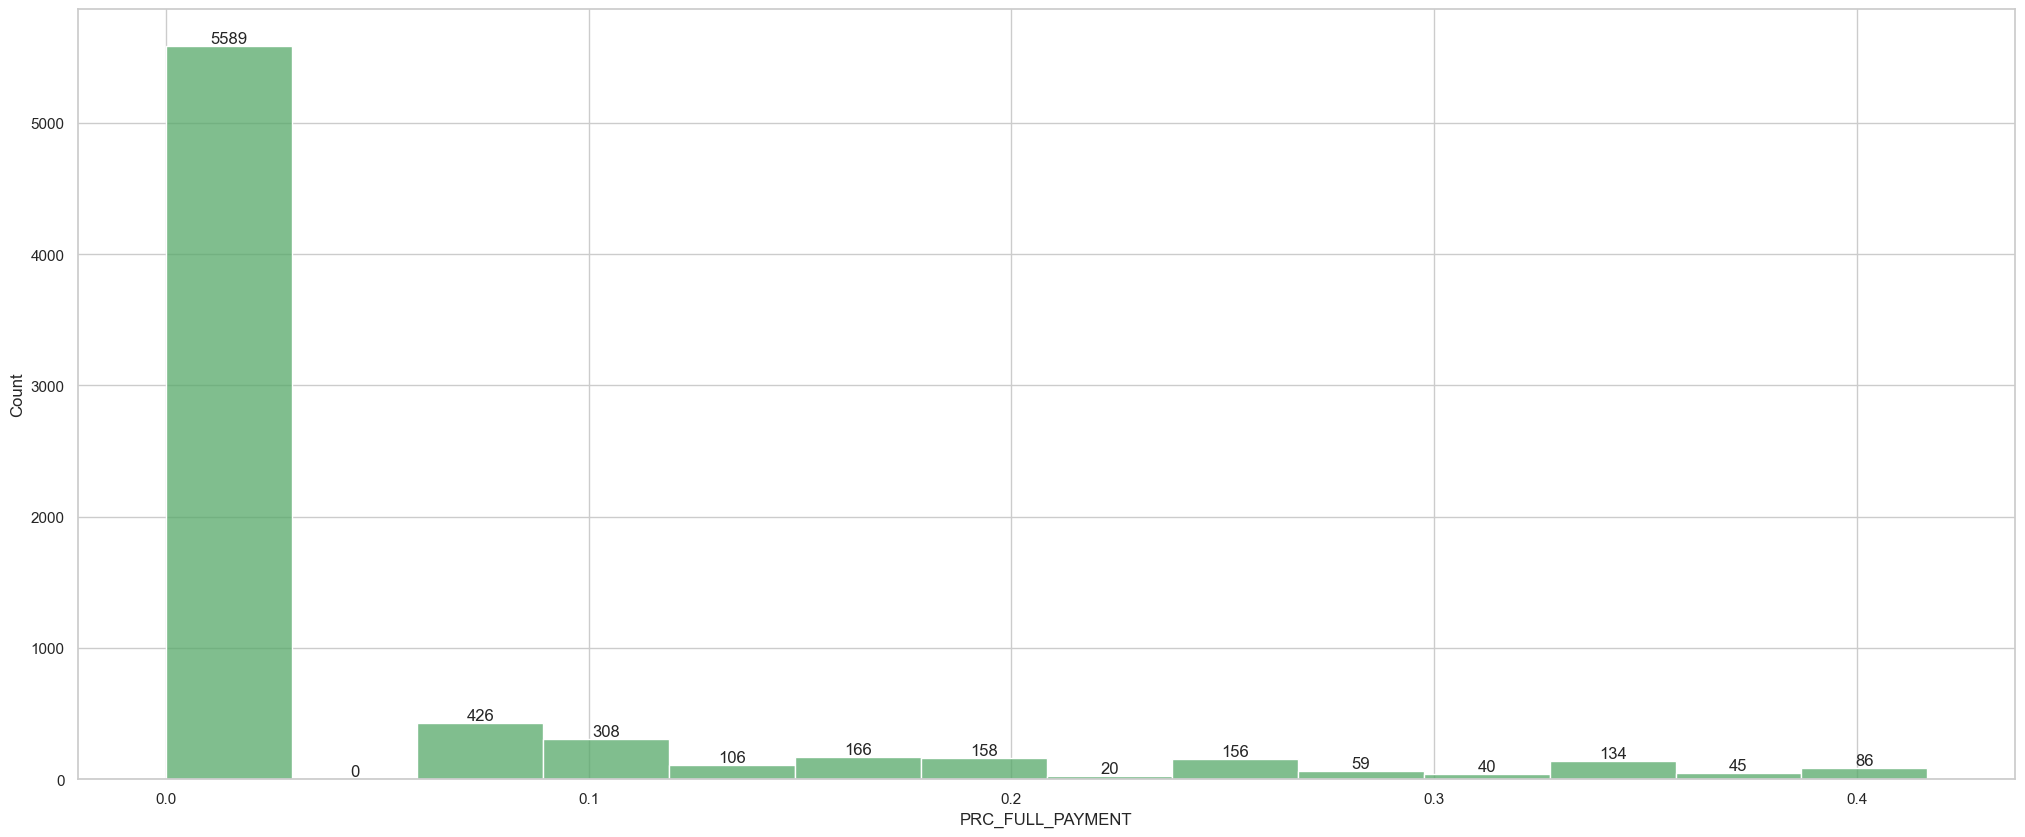

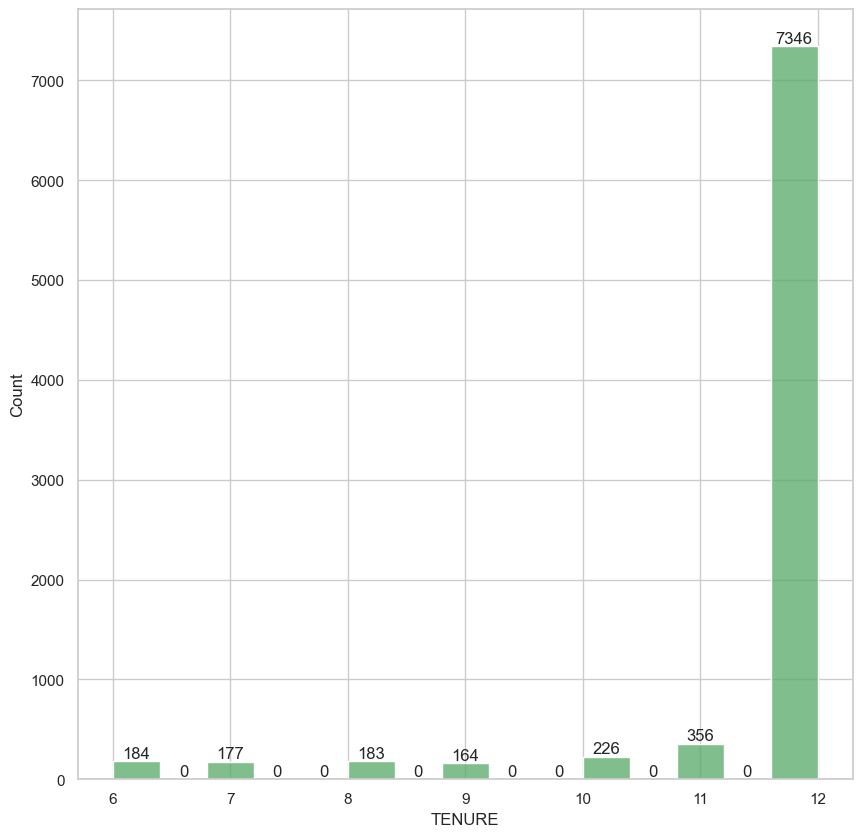

In [15]:
for i, predictor in enumerate(df):
    distribution_plot(str(predictor))

- BALANCE is between 148 to 2105 with the median at 917. Most of them owed smaller amount of money which means they have good credit score in this aspect. Similar to BALANCE_FREQUENCY, most of them paid their BALANCE on time.
- PURCHASES done by the clients are mostly between 43 to 1146 with the median at 375, i.e most of them are not spending much on the credit card and about a quarter of them didn't do any purchases. Based on PURCHASES_FREQUENCY, the distribution is skewed on both sides, i.e most of them are either rarely spends or very frequently spends. But the amount of clients in the frequent purchase range is slightly higher. Hence, most of the clients purchase very frequent but the total expenditure are not high. The other half meanwhile, purchase rarely but the purchases' value is very high or vice versa.  More conclusion can be made from ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES to understand this issue. As for PURCHASES_TRX, about a quarter of clients didn't do any purchases transaction and the median is 7 and about half of them did some transactions between 1 to 12 times.
- ONEOFF_PURCHASES done by the clients are very low as the median is 45, i.e most of them did one off purchases at very low value and half of them didn't do any one off purchases. From ONEOFF_PURCHASES_FREQUENCY, most of the client never (more than 4000 clients) or very rarely did one-off purchases as the median is only at 0.08. 
- INSTALLMENTS_PURCHASES done by the clients are also mostly done at very low values as the median is at 95 and most of them did installment purchases at very low value (almost half never did any installment purchases). Based on PURCHASES_INSTALLMENTS_FREQUENCY, about half of them didn't do any installment purchases at all and almost a quarter of them did installment purchases frequently.
- CASH_ADVANCE done by more than half of the clients are zero. For those who does any cash advance, did it at value less than 1000. Similar to CASH_ADVANCE_FREQUENCY, the median is 0and 75% at 0.25. CASH_ADVANCE_TRX also shows that most did not do any transaction as median is 0 and at 75%, only 4 transactions are made.

To sum up about the clients' spending behaviour, a quarter of them never use the credit card to purchase anything and half of them (excluding the non-user) spend less than 2000, i.e. about 75% spend less than 2000. Considering that the credit limit for 25% of them is at 1600 and 75% is at 6500, the credit card owner is either under utilize their card or a very good credit card user as they are attentive about their credit limit. Overall, the clients are very good at controlling their expenditure, most didn't went beyond their limits. They try to avoid to use credit cards and for those who do, are careful of their limits. 

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


6) Data clustering

Scenario 1 : take all the features

In [26]:
X = df.values

In [27]:
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

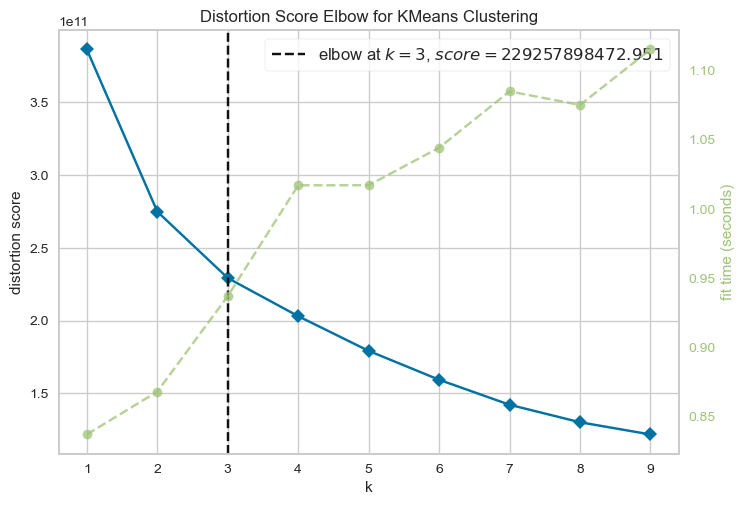

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [29]:
# Apply KMeans algorithm to the dataset

kmeans = KMeans(n_clusters=3, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


How you can visualize the clustering now? Well, you cannot do it directly if you have more than 3 columns. However, you can apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead.

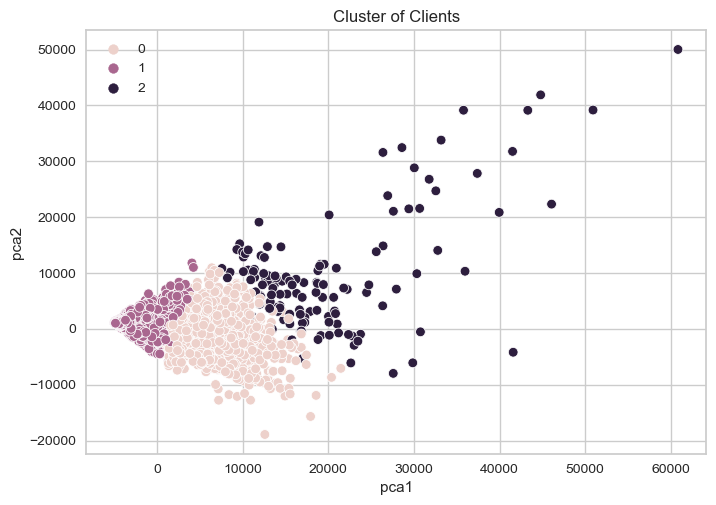

In [30]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y_kmeans, data=results)
plt.title('Cluster of Clients')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

Scenario 2 : take only spending behaviour related features

In [113]:
# Choose the features to be included
X = df.iloc[:, 2:11].values

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

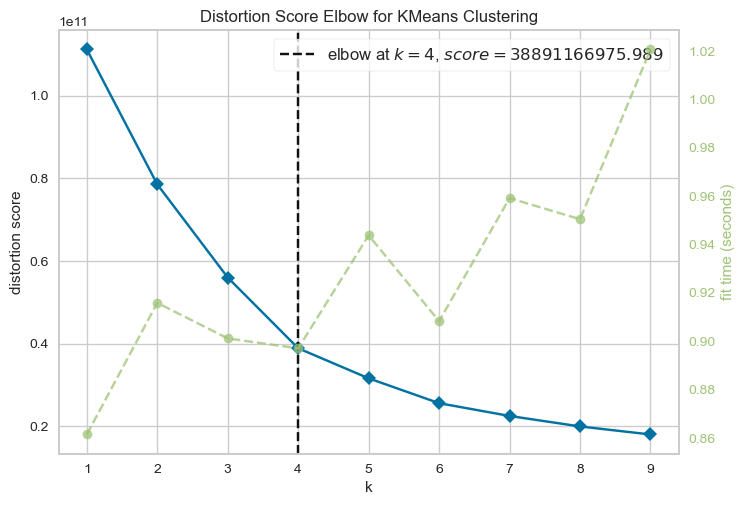

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [47]:
#Silhouette method to determine no of clusters
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.7895278321560731
For n_clusters = 3 The average silhouette_score is : 0.6288711616140055
For n_clusters = 4 The average silhouette_score is : 0.643208739453368
For n_clusters = 5 The average silhouette_score is : 0.5563699711276096
For n_clusters = 6 The average silhouette_score is : 0.5568140512769297


In [34]:
# Apply KMeans algorithm to the dataset

kmeans = KMeans(n_clusters=4, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


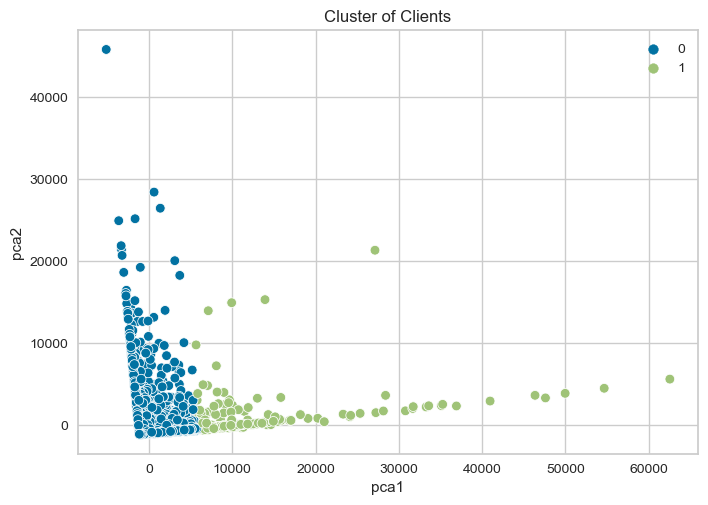

In [35]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y_kmeans, data=results)
plt.title('Cluster of Clients')
plt.show()

Let's try to compare between K-Means Clustering, Gaussian Mixture Model Clustering (model-based clustering), Agglomerative Clustering (Hierarchical clustering) and DBScan clustering (Density-based clustering). We try to take every features in this case study.

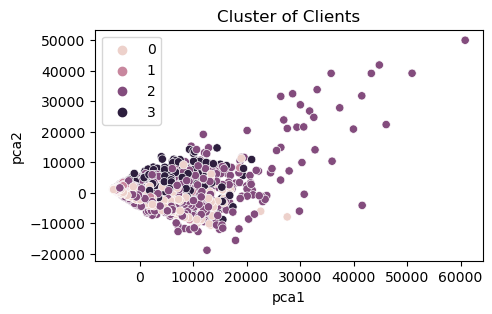

In [38]:
#Gaussian Mixture Model Clustering
X = df.values
from sklearn.mixture import GaussianMixture
# define the model
gaussian_model = GaussianMixture(n_components=4)

# train the model
gaussian_model.fit(X)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(X)

from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=gaussian_result, data=results)
plt.title('Cluster of Clients')
plt.show()

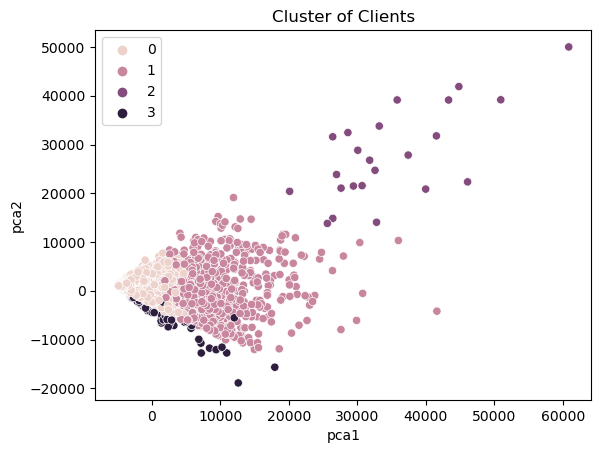

In [11]:
#Agglomerative Clustering
X = df.values
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4).fit_predict(X)

from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=clustering , data=results)
plt.title('Cluster of Clients')
plt.show()

DBScan : Density-based clustering

Parameters Required For DBSCAN Algorithm
eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

MinPts: Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

In [36]:
X = df.values
X.shape

(8636, 17)

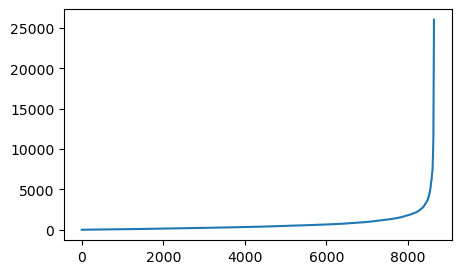

In [34]:
#To determine the eps of the DBScan
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Estimated number of clusters: 3


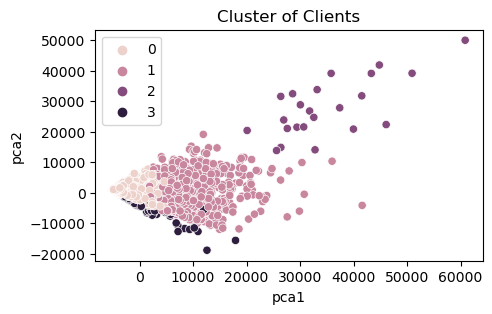

In [37]:

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1000, min_samples=20).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=clustering , data=results)
plt.title('Cluster of Clients')
plt.show()

Based on the results K-Means Clustering method is the best in this type of method since K-Means is effective when the datapoints are spherical or convex in shape. Eventhough it is sensitive to outliers, their amounts are too miniscule to influence the result.